# Objective

## Get insights from the Billionaire Dataset

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.21.5
Pandas Version 1.4.4
Seaborn Version 0.11.2
Matplotlib Version 3.5.2


### Read the data

In [3]:
df = pd.read_excel('Billionaire Dataset.xlsx')

In [4]:
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8100000000000,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,10600000000000,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8100000000000,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,10600000000000,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [5]:
df.tail()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,...,0,East Asia,executive,1.0,Traded Sectors,True,Non-consumer industrial,not inherited,True,True
2610,Wu Xiong,1565,2014,1999,Biostime International Holdings,owner,infant formula,new,0,male,...,0,East Asia,executive,1.0,Traded Sectors,True,Consumer,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,0,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,0,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True
2613,Zhu Wenchen,1565,2014,1999,Furen Pharmaceutical Group,chairman,pharmaceuticals,new,48,male,...,0,East Asia,executive,1.0,New Sectors,True,Technology-Medical,not inherited,True,True


<div class='alert alert-block alert-info'>
The data read from the 'Billionaire Dataset.xlsx' looks good.
</div>

In [6]:
df.shape

(2614, 22)

<div class='alert alert-block alert-info'>
    
**Insights:**    
There are 2614 observations in the dataset and the number of attributes are 22.   
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   int64  
 13  location.region           2614 non-null   object 
 14  wealth.t

<div class='alert alert-block alert-info'>
    
**Insights:**    
The attributes of type int64 are:  
- rank
- year
- company.founded
- demographics.age
- location.gdp

The attributes of type float 64 are:
- wealth.worth in billions

The attributes of type object are:
- name
- company.name
- company.relationship
- company.sector
- company.type
- demographics.gender
- location.citizenship
- location.country code
- location.region
- wealth.type 
- wealth.how.category
- wealth.how.industry
- wealth.how.inherited 

The attributes of type bool are:
- wealth.how.from emerging
- wealth.how.was founder
- wealth.how.was political

</div>

In [8]:
df.isnull().sum().sort_values(ascending=False)

company.relationship        46
company.name                38
company.type                36
demographics.gender         34
company.sector              23
wealth.type                 22
wealth.how.industry          1
wealth.how.category          1
name                         0
wealth.how.was founder       0
wealth.how.inherited         0
wealth.how.from emerging     0
wealth.worth in billions     0
location.country code        0
location.region              0
location.gdp                 0
rank                         0
location.citizenship         0
demographics.age             0
company.founded              0
year                         0
wealth.how.was political     0
dtype: int64

<div class='alert alert-block alert-info'>
    
**Insights:**    
The columns that do not have null are:
- name                       
- wealth.how.was founder       
- wealth.how.inherited         
- wealth.how.from emerging     
- wealth.worth in billions     
- location.country code        
- location.region              
- location.gdp                 
- rank                         
- location.citizenship         
- demographics.age             
- company.founded              
- year                      
- wealth.how.was political     

The other columns have null values.
</div>

In [9]:
for col in df.columns:
    print(col,':',df[col].unique(),'\n\n')

name : ['Bill Gates' 'Warren Buffett' 'Carlos Slim Helu' ... 'Yang Keng'
 'Zdenek Bakala' 'Zhu Wenchen'] 


rank : [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  1

<div class='alert alert-block alert-info'>
    
**Insights:**    
- This gives a brief overview of the values in different columns
</div>

In [10]:
print('The number of duplicate observations are',df.duplicated().sum())

The number of duplicate observations are 0


<div class='alert alert-block alert-info'>
    
**Insights:**    
There are no duplicate rows in th given dataset
</div>

<div class='alert alert-block alert-info'>
    
**Insights:** 
- We find that the numeric columns are 
    - rank
    - year
    - company.founded
    - demographics.age
    - location.gdp
    - wealth.worth in billions

- the categorical columns are
    - name
    - company.name
    - company.relationship
    - company.sector
    - company.type
    - demographics.gender
    - location.citizenship
    - location.country code
    - location.region
    - wealth.type 
    - wealth.how.category
    - wealth.how.industry
    - wealth.how.inherited 
    - wealth.how.from emerging
    - wealth.how.was founder
    - wealth.how.was political
    
</div>

In [11]:
num_cols = ['rank', 'year', 'company.founded', 'demographics.age', 'location.gdp', 'wealth.worth in billions']

In [12]:
cat_cols = ['name', 'company.name', 'company.relationship', 'company.sector', 'company.type', 'demographics.gender', 'location.citizenship', 'location.country code', 'location.region', 'wealth.type', 'wealth.how.category', 'wealth.how.from emerging', 'wealth.how.industry', 'wealth.how.inherited', 'wealth.how.was founder', 'wealth.how.was political' ]

In [13]:
df.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [14]:
df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


### null value graph

In [15]:
import missingno as msno
%matplotlib inline

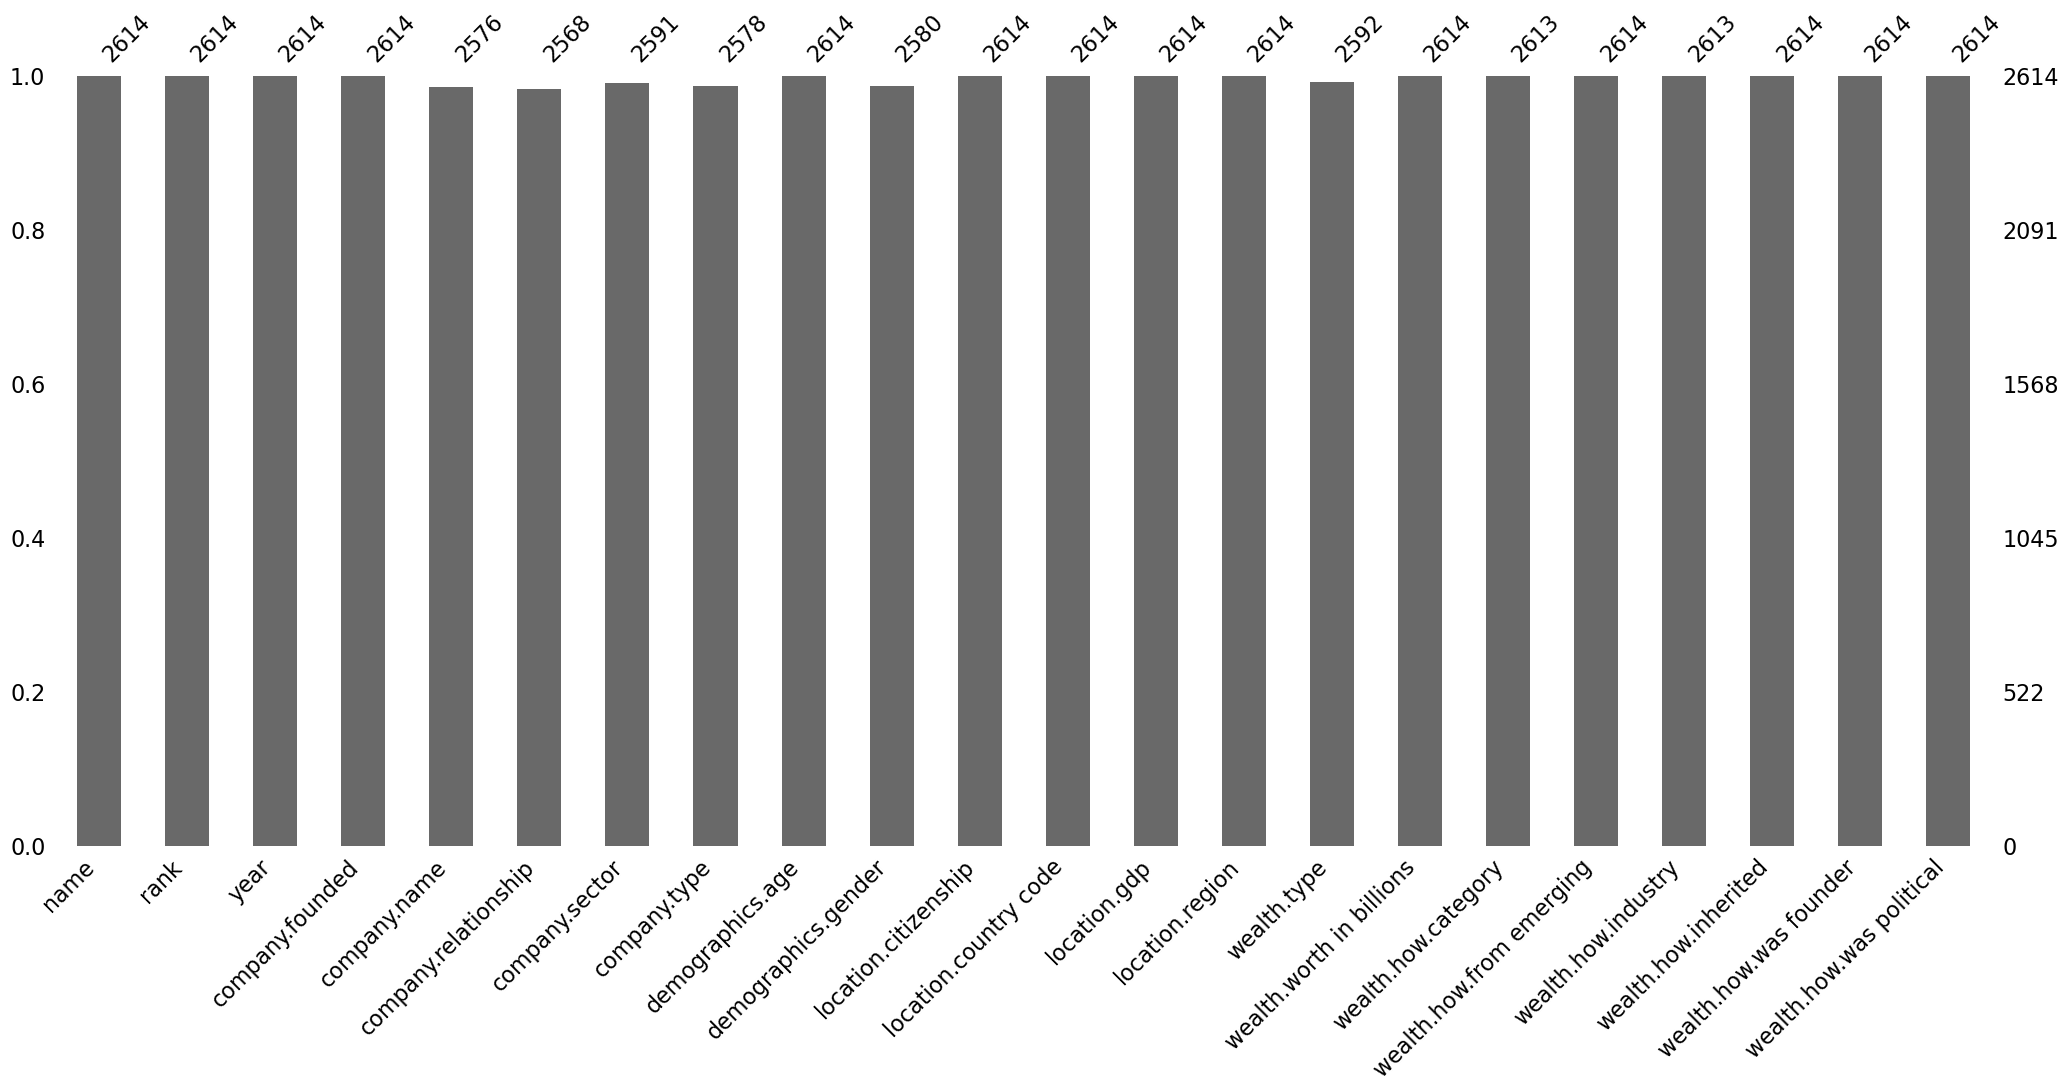

In [16]:
msno.bar(df);

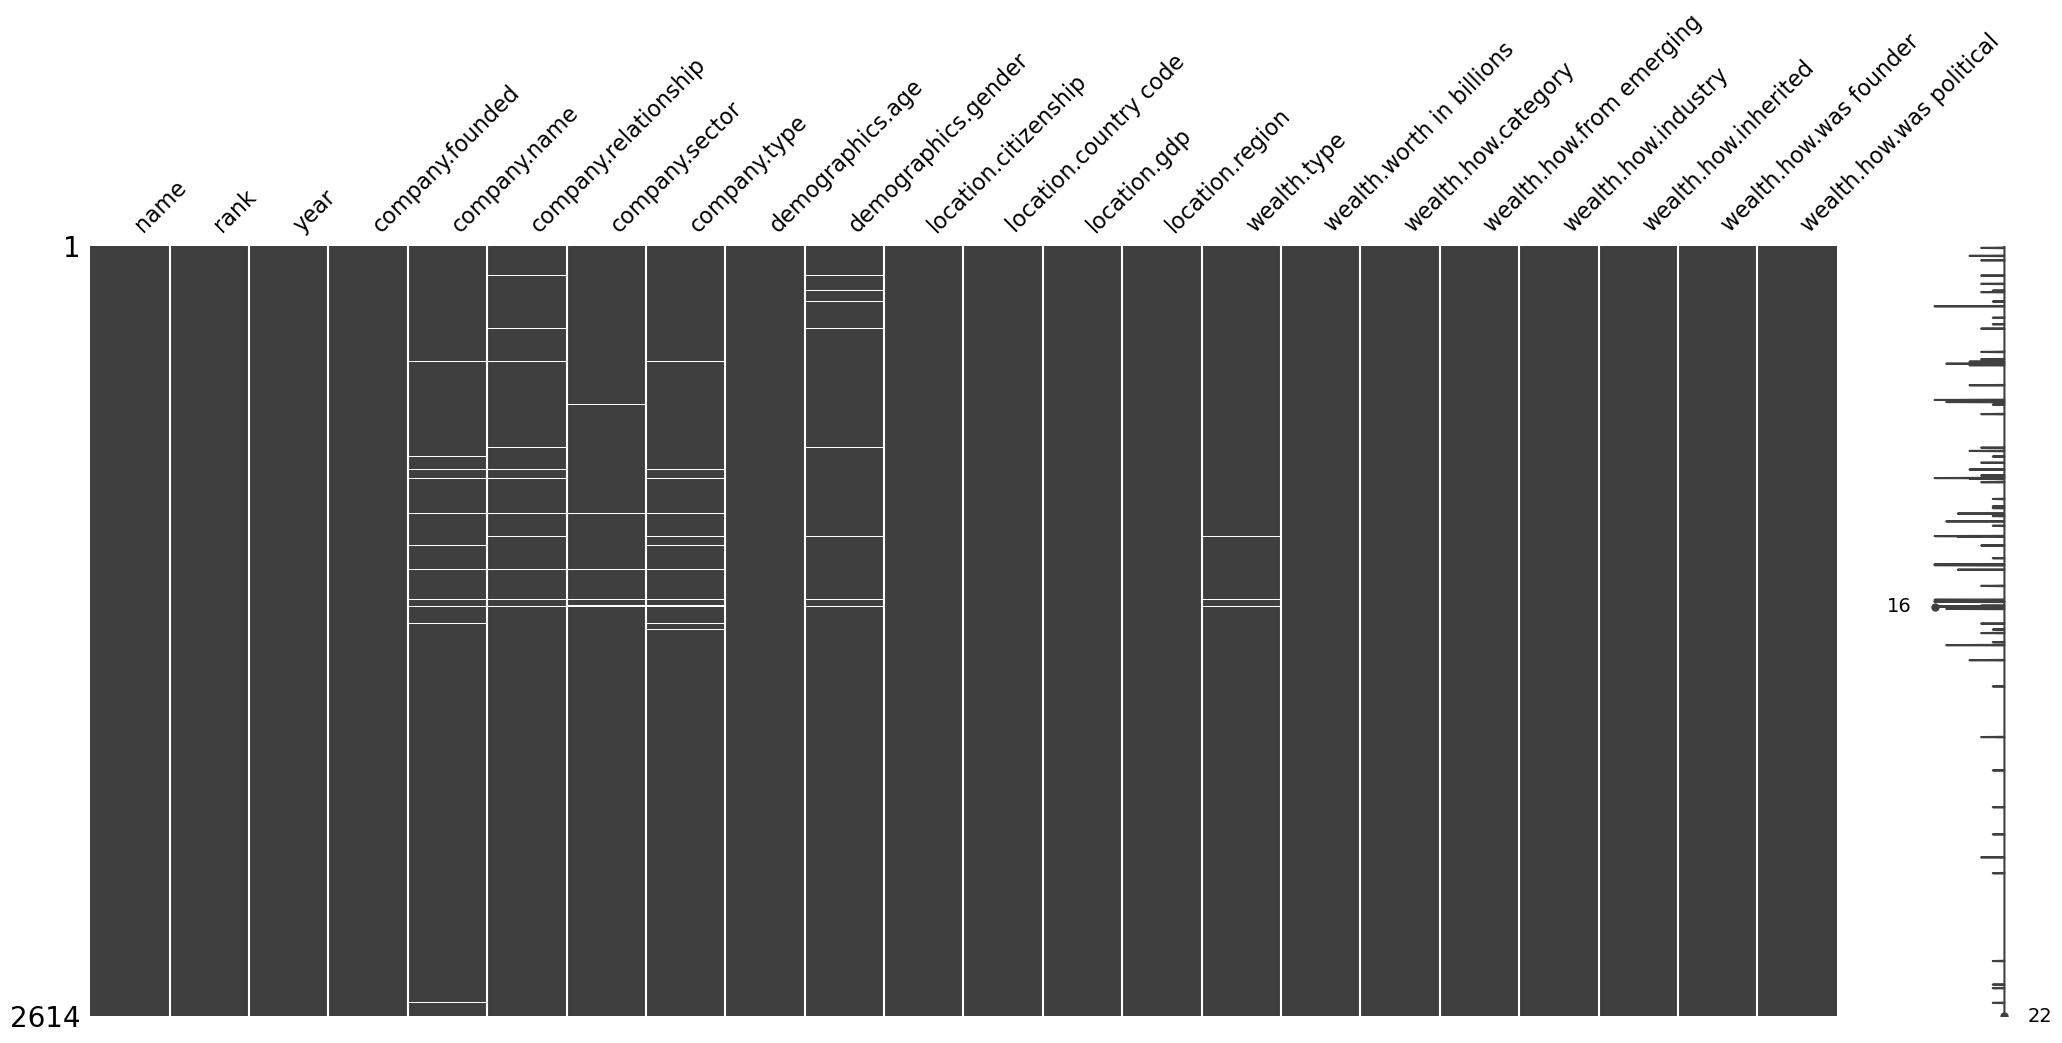

In [17]:
msno.matrix(df);

### remove garbage values and treat null values

### name variable

In [18]:
df['name'].unique()

array(['Bill Gates', 'Warren Buffett', 'Carlos Slim Helu', ...,
       'Yang Keng', 'Zdenek Bakala', 'Zhu Wenchen'], dtype=object)

In [19]:
df['name'].describe()

count           2614
unique          2077
top       Bill Gates
freq               3
Name: name, dtype: object

<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### rank variable

In [20]:
df['rank'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [21]:
print('Null values in rank attribute',df['rank'].isnull().sum())

Null values in rank attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### year variable

In [22]:
df['year'].unique()

array([1996, 2001, 2014])

In [23]:
print('Null values in year attribute',df['year'].isnull().sum())

Null values in year attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### company.founded

In [24]:
df['company.founded'].unique()

array([1975, 1962, 1990, 1896, 1976, 1977, 1839, 1913, 1963, 1980, 1940,
       1971, 1894, 1952, 1951, 1916, 1909, 1756, 1947, 1934, 1956, 1987,
       1972, 1961, 1981, 1958, 1943, 1998, 1936, 1995, 1946, 1950, 1898,
       2004, 1948, 1914, 1929, 1957, 1968, 1964, 1969, 1906, 1984, 1970,
       1955, 1978, 1930,    0, 1919, 1911, 1668, 1999, 1953, 1938, 1923,
       1899, 1945, 1949, 1876, 1677, 1924, 2001, 1989, 1921, 1885, 1869,
       1926, 1992, 1965, 1994, 1888, 1959, 1865, 2000, 1927, 1841, 1988,
       1967, 1982, 1864, 1882, 1890, 1954, 1867, 1985, 1960, 1904, 1941,
       1835, 1886, 1983, 1991, 1891, 1944, 1853, 1860, 1993, 1986, 1889,
       1939, 1837, 1974, 1849, 1857, 1973, 1912, 1847, 1905, 1997, 1834,
       1966, 1851, 1942, 1931, 1979, 1925, 1996, 1881, 1873, 1901, 1816,
       1895, 1933, 1800, 1870, 1822, 1813, 1880, 1789, 1932, 1712, 2009,
       1920, 1863, 1900, 1928, 1903, 1883, 1884, 1810, 1902, 1615, 2003,
       1935, 1910, 1922, 1848, 1937, 1610, 1892, 20

In [25]:
print('The number of observations with company.founded year as 0 are',len(df[df['company.founded']== 0]))

The number of observations with company.founded year as 0 are 40


In [26]:
print('Null values in company.founded attribute',df['company.founded'].isnull().sum())

Null values in company.founded attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null in this variable
- The value 0 in this variable is erroneous as the year the company founded cannot be 0

**Actions:**
- Find the corresponding company in the table and get the year founded
- Get an alternate action
- impute with the median-
</div>

In [27]:
rep_company_founded = df['company.founded'].median()
df['company.founded'] = df['company.founded'].replace(0, rep_company_founded)

In [28]:
df[df['company.founded']== 0]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political


### company.name variable

In [29]:
df['company.name'].unique()

array(['Microsoft', 'Berkshire Hathaway', 'Telmex', ..., 'Blue Ray Corp',
       'Patria Finance', 'Furen Pharmaceutical Group'], dtype=object)

In [30]:
print('Null values in company.name attribute',df['company.name'].isnull().sum())

Null values in company.name attribute 38


In [31]:
# impute null values with NONAME
df['company.name'].fillna(value= 'NONAME', inplace = True)

In [32]:
print('Null values in company.name attribute',df['company.name'].isnull().sum())

Null values in company.name attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There were 38 null in this variable
- There are no garbage values/erroneous values in this variable

**Actions:**
- The null value is imputed with NONAME value
</div>

### company.relationship variable

In [33]:
df['company.relationship'].unique()

array(['founder', nan, 'founder/chairman', 'Relation', 'relation', 'CEO',
       'chairman', 'investor', 'founder and CEO', 'founder/CEO', 'owner',
       'chairman of management committee', 'founder and chairman',
       'Chairman and Chief Executive Officer', 'general director',
       'executive chairman', 'Chairman/founder', 'founder, chairman, ceo',
       'former chairman and CEO', 'relation and chairman',
       'investor/founder', 'partner', 'president', 'investor and  CEO',
       'founder CEO owner', 'Chairman/shareholder', 'Vice President',
       'chairman of the board', 'founder/relation', 'ceo', 'investor ',
       'founder/vice chairman', 'Chairman', 'Honorary President for Life',
       'former CEO', 'inherited', 'vice-chairman', 'owner and vice chair',
       'founder/president', 'co-chairman', 'lawer',
       'relation/vice chairman', 'Chairman, CEO', 'employee',
       "head of Microsoft's application software group", 'chariman',
       'Exectuitve Director', 'vice c

In [34]:
print('Null values in company.relationship attribute',df['company.relationship'].isnull().sum())

Null values in company.relationship attribute 46


In [35]:
df['company.relationship'].describe()

count        2568
unique         74
top       founder
freq         1214
Name: company.relationship, dtype: object

In [36]:
## impute the null values with mode
impute_company_relationship = df['company.relationship'].mode()[0]
df['company.relationship'].fillna(value= impute_company_relationship, inplace = True)

In [37]:
print('Null values in company.relationship attribute',df['company.relationship'].isnull().sum())

Null values in company.relationship attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There were 46 null in this variable
- There are no erroneous values in this variable

**Actions:**
- The null values are imputed with mode for this variable
</div>

### company.sector variable

In [38]:
df['company.sector'].unique()

array([' Software', ' Finance', ' Communications', 'pharmaceuticals',
       'technology', 'Fashion', 'real estate', ' software',
       'banking and insurance', 'groceries',
       'construction/real estate/banking', '  Oil refining',
       ' Oil refining', 'retail', ' retail', ' casinos', 'food packaging',
       'cars', 'cosmetics', nan, ' fashion', 'media', 'luxury goods',
       'oil, railroad, investments', ' finance', 'cigarettes',
       'furniture', ' technology', 'oil', 'chocolates', 'banking',
       'commodities (sugar, cement flour)', 'computer services',
       'investment (via holding company)', 'apparel', 'hedge funds',
       'mail order retail', 'construction, hotels, gaming', 'finance',
       'investment banking', 'metals, paper, cement', 'candy',
       'investment banking/beer', 'electronics', 'oil infrastructure',
       'glasses', 'aluminum, oil', 'brewery', 'metals', 'textiles',
       'software', 'chemicals', 'coal', 'consumer goods', 'mining',
       'ventur

In [39]:
print('Null values in company.sector attribute',df['company.sector'].isnull().sum())

Null values in company.sector attribute 23


In [40]:
df['company.sector'].describe()

count            2591
unique            520
top       real estate
freq              177
Name: company.sector, dtype: object

In [41]:
df[df['company.sector'].isnull()]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
33,Haniel family,12,1996,1756,Franz Haniel & Cie,founder,NaN,new,0,NaN,...,2500000000000,Europe,inherited,8.1,Financial,True,Diversified financial,not inherited,True,True
204,Shin Kyuk-Ho,69,1996,1963,NONAME,founder,NaN,NaN,0,NaN,...,603000000000,East Asia,NaN,3.6,Traded Sectors,True,Consumer,not inherited,True,True
243,Garry Weston,82,1996,1882,George Weston Limited,relation,NaN,new,0,male,...,1310000000000,Europe,inherited,3.3,Traded Sectors,True,Consumer,father,True,True
399,Goroemon Yoshimoto,132,1996,1963,NONAME,founder,NaN,NaN,0,male,...,4710000000000,East Asia,NaN,2.5,Financial,True,Real Estate,not inherited,True,True
522,Funke family,174,1996,1963,NONAME,founder,NaN,NaN,0,NaN,...,2500000000000,Europe,NaN,2.1,Non-Traded Sectors,True,Media,not inherited,True,True
529,Masahiro Ohga,176,1996,1963,NONAME,founder,NaN,NaN,0,male,...,4710000000000,East Asia,NaN,2.1,Non-Traded Sectors,True,Media,not inherited,True,True
538,Jeffrey Koo Sr,179,1996,1930,Koos Group,relation,NaN,new,0,male,...,0,East Asia,inherited,2.1,Financial,True,Money Management,3rd generation,True,True
787,Simon family,257,1996,1963,NONAME,founder,NaN,NaN,0,NaN,...,2500000000000,Europe,NaN,1.5,Traded Sectors,True,Consumer,not inherited,True,True
907,Jose Said Saffie,296,1996,1963,NONAME,founder,NaN,NaN,0,male,...,75800000000,Latin America,self-made finance,1.3,Finance,True,banking,not inherited,True,True
908,Jaime Said Demarfa,297,1996,1963,NONAME,founder,NaN,NaN,0,male,...,75800000000,Latin America,executive,1.3,Traded Sectors,True,Consumer,not inherited,True,True


In [42]:
### the observations with null values are dropped
df.dropna(axis = 0,
          subset='company.sector',
          inplace=True)

In [43]:
print('Null values in company.sector attribute',df['company.sector'].isnull().sum())

Null values in company.sector attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There were 23 null in this variable
- There are no erroneous values in this variable

**Actions:**
- The null values observartions are dropped for this variable
</div>

### company.type variable

In [44]:
df['company.type'].unique()

array(['new', 'privatization', ' new', 'aquired', ' acquired', 'acquired',
       'new/aquired', 'subsidiary', 'new ', nan, 'new division', 'merger',
       'franchise', 'state owned enterprise', 'privatized',
       'new, privitization', 'neew', 'franchise rights', 'joint venture'],
      dtype=object)

In [45]:
print('Null values in company.type attribute',df['company.type'].isnull().sum())

Null values in company.type attribute 16


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There were 16 null in this variable
- There are erroneous values in this variable
    for example  
    - 'new' ' new' 'new ' 'neew'
    - 'aquired' ' acquired' 'acquired'

**Actions:**
- The  values in the observations 
   - 'new' ' new' 'new ' 'neew' are replaced with 'new'
   - 'aquired' ' acquired' 'acquired' are replaced with 'acquired'
</div>

In [46]:
df['company.type'] = df['company.type'].replace([' new', 'new ', 'neew'], 'new')

In [47]:
df['company.type'] = df['company.type'].replace(['aquired', ' acquired'], 'acquired')

In [48]:
df['company.type'].unique()

array(['new', 'privatization', 'acquired', 'new/aquired', 'subsidiary',
       nan, 'new division', 'merger', 'franchise',
       'state owned enterprise', 'privatized', 'new, privitization',
       'franchise rights', 'joint venture'], dtype=object)

In [49]:
df['company.type'].describe()

count     2575
unique      13
top        new
freq      2300
Name: company.type, dtype: object

In [50]:
# impute null value with mode
impute_company_type = df['company.type'].mode()[0]
df['company.type'].fillna(value= impute_company_type, inplace = True)

In [51]:
print('Null values in company.type attribute',df['company.type'].isnull().sum())

Null values in company.type attribute 0


### demographics.age variable

In [52]:
df['demographics.age'].unique()

array([ 40,  45,  58,  65,  70,  74,   0,  48,  77,  68,  56,  83,  71,
        69,  44,  78,  73,  67,  53,  61,  55,  80,  57,  59,  52,  81,
        66,  91,  43,  64,  72,  50,  51,  85,  29,  88,  94,  86,  35,
        36,  84,  39,  82,  62,  63,  76,  60,  47,  38,  49,  75,  90,
        42,  79,  46,  41,  54,  33,  87,  89,  37,  92,  30,  34,  28,
        32,  31, -42,  12,  96,  -7,  21,  24,  93,  98,  95])

In [53]:
print('Null values in demographics.age attribute',df['demographics.age'].isnull().sum())

Null values in demographics.age attribute 0


In [54]:
df['demographics.age'].describe()

count    2591.000000
mean       53.793902
std        24.962025
min       -42.000000
25%        48.000000
50%        60.000000
75%        70.000000
max        98.000000
Name: demographics.age, dtype: float64

In [55]:
## replace the values 0, -7, -42with median
rep_demographic_age = df['demographics.age'].median()
df['demographics.age'] = df['demographics.age'].replace([0,-7,-42], rep_demographic_age)

In [56]:
df['demographics.age'].unique()

array([40, 45, 58, 65, 70, 74, 60, 48, 77, 68, 56, 83, 71, 69, 44, 78, 73,
       67, 53, 61, 55, 80, 57, 59, 52, 81, 66, 91, 43, 64, 72, 50, 51, 85,
       29, 88, 94, 86, 35, 36, 84, 39, 82, 62, 63, 76, 47, 38, 49, 75, 90,
       42, 79, 46, 41, 54, 33, 87, 89, 37, 92, 30, 34, 28, 32, 31, 12, 96,
       21, 24, 93, 98, 95])

<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are 0 null in this variable
- There are erroneous values in this variable
    - -42, -7 and 0

**Actions:**
- The  values -42, -7 and 0 are replaced with the median in the observations 
   
</div>

### demographics.gender variable

In [57]:
df['demographics.gender'].unique()

array(['male', nan, 'female', 'married couple'], dtype=object)

In [58]:
print('Null values in demographics.gender attribute',df['demographics.gender'].isnull().sum())

Null values in demographics.gender attribute 22


In [59]:
df['demographics.gender'].describe()

count     2569
unique       3
top       male
freq      2318
Name: demographics.gender, dtype: object

In [60]:
## impute the null values with mode
impute_demographics_gender = df['demographics.gender'].mode()[0]
df['demographics.gender'].fillna(value= impute_demographics_gender, inplace = True)

In [61]:
print('Null values in demographics.gender attribute',df['demographics.gender'].isnull().sum())

Null values in demographics.gender attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There were 22 null in this variable

**Actions:**
- The  null values are imputed with the mode value
   
</div>

### location.citizenship variable

In [62]:
df['location.citizenship'].unique()

array(['United States', 'Mexico', 'Switzerland', 'Spain', 'Hong Kong',
       'Taiwan', 'Germany', 'Saudi Arabia', 'Japan', 'Sweden', 'France',
       'Canada', 'Philippines', 'Indonesia', 'South Korea', 'Malaysia',
       'Italy', 'Singapore', 'Nigeria', 'Brazil', 'Russia', 'India',
       'United Kingdom', 'Australia', 'Thailand', 'Kuwait', 'Turkey',
       'Chile', 'Netherlands', 'Venezuela', 'China', 'Argentina',
       'Greece', 'Colombia', 'Cyprus', 'South Africa', 'Ireland',
       'Ukraine', 'Czech Republic', 'Israel', 'Denmark', 'Lebanon',
       'Austria', 'New Zealand', 'Egypt', 'Bermuda', 'Portugal',
       'United Arab Emirates', 'Liechtenstein', 'Georgia', 'Norway',
       'Belgium', 'Ecuador', 'Bahrain', 'Peru', 'Angola', 'Swaziland',
       'Poland', 'Finland', 'Algeria', 'Morocco', 'Guernsey',
       'Kazakhstan', 'Macau', 'Monaco', 'Vietnam', 'Romania',
       'St. Kitts and Nevis', 'Oman', 'Nepal', 'Uganda', 'Lithuania',
       'Tanzania'], dtype=object)

In [63]:
print('Null values in location.citizenship attribute',df['location.citizenship'].isnull().sum())

Null values in location.citizenship attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### location.country code variable

In [64]:
df['location.country code'].unique()

array(['USA', 'MEX', 'CHE', 'ESP', 'HKG', 'Taiwan', 'DEU', 'SAU', 'JPN',
       'SWE', 'FRA', 'CAN', 'PHL', 'IDN', 'KOR', 'MYS', 'ITA', 'SGP',
       'NGA', 'BRA', 'RUS', 'IND', 'GBR', 'AUS', 'THA', 'KWT', 'TUR',
       'CHL', 'NLD', 'VEN', 'CHN', 'ARG', 'GRC', 'COL', 'CYP', 'ZAF',
       'IRL', 'UKR', 'CZE', 'ISR', 'DEN', 'LBN', 'AUT', 'DNK', 'NZL',
       'FIN', 'BMU', 'PRT', 'ARE', 'LIE', 'GEO', 'NOR', 'BEL', 'ECU',
       'BHR', 'PER', 'AGO', 'SWZ', 'POL', 'EGY', 'DZA', 'MAR', 'GGY',
       'KAZ', 'MAC', 'MCO', 'VNM', 'ROU', 'KNA', 'OMN', 'NPL', 'UGA',
       'LTU', 'TZA'], dtype=object)

In [65]:
print('Null values in location.country code attribute',df['location.country code'].isnull().sum())

Null values in location.country code attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### location.gdp

In [66]:
df['location.gdp'].unique()

array([ 8100000000000, 10600000000000,              0,   330000000000,
         160000000000,  1950000000000,   183000000000,  4710000000000,
        2500000000000,   288000000000,   627000000000,   733000000000,
        1380000000000,    82848194406,   227000000000,   240000000000,
         397000000000,   169000000000,   603000000000,  1610000000000,
         101000000000,    96400967339,   725000000000,   279000000000,
        1160000000000,   854000000000,  1310000000000,   158000000000,
        4160000000000,   494000000000,   626000000000,  1530000000000,
         182000000000,    34890773880,   181000000000,   443000000000,
         123000000000,   272000000000,   147000000000,   136000000000,
         122000000000,    31492936826,   426000000000,   196000000000,
          92783947368,   130000000000,   560000000000,    89285087395,
          13690217121,   188000000000,   148000000000,    17649751244,
          75800000000,   400000000000,   379000000000,   109000000000,
      

In [67]:
df[df['location.gdp'] == 0][['name','year','location.country code','location.gdp']]

,name,year,location.country code,location.gdp
2,Bill Gates,2014,USA,0
5,Carlos Slim Helu,2014,MEX,0
8,Amancio Ortega,2014,ESP,0
11,Warren Buffett,2014,USA,0
12,Tsai Wan-lin,1996,Taiwan,0
...,...,...,...,...
2609,Wu Chung-Yi,2014,Taiwan,0
2610,Wu Xiong,2014,CHN,0
2611,Yang Keng,2014,CHN,0
2612,Zdenek Bakala,2014,CZE,0


In [68]:
df[df['name'] == 'Bill Gates'][['name','year','location.country code','location.gdp']]

,name,year,location.country code,location.gdp
0,Bill Gates,1996,USA,8100000000000
1,Bill Gates,2001,USA,10600000000000
2,Bill Gates,2014,USA,0


In [69]:
print('Null values in location.gdp attribute',df['location.gdp'].isnull().sum())

Null values in location.gdp attribute 0


In [70]:
df['location.gdp'].describe()

count    2.591000e+03
mean     1.761874e+12
std      3.553931e+12
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.270000e+11
max      1.060000e+13
Name: location.gdp, dtype: float64

In [71]:
df['location.gdp'].unique()

array([ 8100000000000, 10600000000000,              0,   330000000000,
         160000000000,  1950000000000,   183000000000,  4710000000000,
        2500000000000,   288000000000,   627000000000,   733000000000,
        1380000000000,    82848194406,   227000000000,   240000000000,
         397000000000,   169000000000,   603000000000,  1610000000000,
         101000000000,    96400967339,   725000000000,   279000000000,
        1160000000000,   854000000000,  1310000000000,   158000000000,
        4160000000000,   494000000000,   626000000000,  1530000000000,
         182000000000,    34890773880,   181000000000,   443000000000,
         123000000000,   272000000000,   147000000000,   136000000000,
         122000000000,    31492936826,   426000000000,   196000000000,
          92783947368,   130000000000,   560000000000,    89285087395,
          13690217121,   188000000000,   148000000000,    17649751244,
          75800000000,   400000000000,   379000000000,   109000000000,
      

In [72]:
#replace 0 with value closest to mean
repl_location_gdp = 174000000000
df['location.gdp'] = df['location.gdp'].replace(0,repl_location_gdp)


In [73]:
df['location.gdp'].unique()

array([ 8100000000000, 10600000000000,   174000000000,   330000000000,
         160000000000,  1950000000000,   183000000000,  4710000000000,
        2500000000000,   288000000000,   627000000000,   733000000000,
        1380000000000,    82848194406,   227000000000,   240000000000,
         397000000000,   169000000000,   603000000000,  1610000000000,
         101000000000,    96400967339,   725000000000,   279000000000,
        1160000000000,   854000000000,  1310000000000,   158000000000,
        4160000000000,   494000000000,   626000000000,  1530000000000,
         182000000000,    34890773880,   181000000000,   443000000000,
         123000000000,   272000000000,   147000000000,   136000000000,
         122000000000,    31492936826,   426000000000,   196000000000,
          92783947368,   130000000000,   560000000000,    89285087395,
          13690217121,   188000000000,   148000000000,    17649751244,
          75800000000,   400000000000,   379000000000,   109000000000,
      

<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null in this variable
- The value 0 for the variable is an error 

**Action**
-  The necessary replacement for the value 0 needs to be done after finalising on the value
-  Here 0 is replaced with the value closest to mean
</div>

### location.region variable

In [74]:
df['location.region'].unique()

array(['North America', 'Latin America', 'Europe', 'East Asia',
       'Middle East/North Africa', 'Sub-Saharan Africa', 'South Asia', 0],
      dtype=object)

In [75]:
print('Null values in location.region attribute',df['location.region'].isnull().sum())

Null values in location.region attribute 0


In [76]:
df['location.region'].describe()

count              2591
unique                8
top       North America
freq                991
Name: location.region, dtype: object

In [77]:
df[df['location.region']== 0]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
671,Ernest Stempel,222,2001,1919,AIG,chairman,insurance,new,84,male,...,3680000000,0,executive,2.1,New Sectors,True,Technology-Medical,not inherited,True,True


In [78]:
## impute the 0 values with mode
impute_location_region = df['location.region'].mode()[0]
df['location.region'] = df['location.region'].replace(0, impute_location_region)

In [79]:
df['location.region'].describe()

count              2591
unique                7
top       North America
freq                992
Name: location.region, dtype: object

<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null in this variable
- The value 0 for the variable is an error 

**Action**
-  The necessary replacement for the value 0 needs to be done after finalising on the value
-  Here 0 is replaced with the value closest to mode
</div>

### wealth.type variable

In [80]:
df['wealth.type'].unique()

array(['founder non-finance', 'privatized and resources', 'inherited',
       'self-made finance', 'executive', nan], dtype=object)

In [81]:
print('Null values in wealth.type attribute',df['wealth.type'].isnull().sum())

Null values in wealth.type attribute 6


In [82]:
df['wealth.type'].describe()

count          2585
unique            5
top       inherited
freq            950
Name: wealth.type, dtype: object

In [83]:
## impute the null values with mode
impute_wealth_type = df['wealth.type'].mode()[0]
df['wealth.type'].fillna(value= impute_wealth_type, inplace = True)

In [84]:
print('Null values in wealth.type attribute',df['wealth.type'].isnull().sum())

Null values in wealth.type attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**     
- There were 6 null in this variable
- The are no erroneous value for this variable

**Action**
- The null value is imputed with the mode
</div>

### wealth.worth in billions variable

In [85]:
df['wealth.worth in billions'].unique()

array([18.5, 58.7, 76. , 15. , 32.3, 72. , 13.1, 30.4, 64. , 12.7, 26. ,
       58.2, 12.2, 25. , 48. , 11.2, 20. , 40. , 10.6, 18.8,  9.2, 18.7,
       38. ,  9. , 18.6, 36.7, 34.7,  8.1, 34.5, 17.8, 34.4,  7.5, 16.6,
       34.3,  7.4, 16.4, 34.2,  7.2, 15.6, 33.5,  7. , 15.3, 33. ,  6.7,
       13. ,  6.1, 12.6, 32. ,  6. , 31.8,  5.9, 12. , 31. ,  5.7, 11.7,
       28.5, 26.5, 11.5,  5.5, 10.9, 10.8, 24.5,  5.3, 10.7, 23. ,  5.2,
       10.5, 22.6, 22. , 10.3, 21.1,  9.1, 20.4,  5.1,  5. , 19.7,  8.8,
       19.6, 19.3,  4.9,  8.3,  4.8,  8. , 19.2,  7.8,  4.7,  7.7,  6.9,
       18.4,  4.6,  6.6,  4.5,  6.5, 17.9,  6.4, 17.7,  6.3, 17.6, 17.5,
       17.4,  4.2, 17.3,  4.1, 17.2, 16.7,  4. ,  5.8, 16.2,  5.6, 16. ,
       15.9, 15.5,  3.9,  5.4,  3.8,  3.7, 15.1, 14.9,  3.6, 14.7, 14.6,
       14.4,  3.5, 14.3, 14.2, 14. ,  3.4, 13.6,  3.3, 13.5, 13.4, 12.8,
        3.2,  3.1, 12.5,  4.4, 12.4, 12.1,  4.3,  3. , 11.6, 11.4, 11.3,
       11.1,  2.9, 11. ,  2.8,  2.7, 10.4,  2.6, 10

In [86]:
print('Null values in wealth.worth in billions attribute',df['wealth.worth in billions'].isnull().sum())

Null values in wealth.worth in billions attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### wealth.how.category variable

In [87]:
df['wealth.how.category'].unique()

array(['New Sectors', 'Traded Sectors', 'Non-Traded Sectors', 'Financial',
       'Resource Related', 0, nan, 'Trucking', 'energy'], dtype=object)

In [88]:
print('Null values in wealth.how.category in billions attribute',df['wealth.how.category'].isnull().sum())

Null values in wealth.how.category in billions attribute 1


In [89]:
df['wealth.how.category'].describe()

count          2590
unique            8
top       Financial
freq            792
Name: wealth.how.category, dtype: object

In [90]:
## impute the 0 values with mode
impute_wealth_how_category = df['wealth.how.category'].mode()[0]
df['wealth.how.category'] = df['wealth.how.category'].replace(0, impute_wealth_how_category)
df['wealth.how.category'].fillna(value=  impute_wealth_how_category, inplace = True)

In [91]:
print('Null values in wealth.how.category in billions attribute',df['wealth.how.category'].isnull().sum())

Null values in wealth.how.category in billions attribute 0


In [92]:
df['wealth.how.category'].unique()

array(['New Sectors', 'Traded Sectors', 'Non-Traded Sectors', 'Financial',
       'Resource Related', 'Trucking', 'energy'], dtype=object)

<div class='alert alert-block alert-info'>
    
**Insights:**     
- There was 1 null in this variable
- The value 0 for this variable is erroneous

**Action**
- The null value and 0 value is imputed with the mode
</div>

### wealth.how.from emerging variable

In [93]:
df['wealth.how.from emerging'].unique()

array([ True])

In [94]:
print('Null values in wealth.how.from emerging in billions attribute',df['wealth.how.from emerging'].isnull().sum())

Null values in wealth.how.from emerging in billions attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### wealth.how.industry variable

In [95]:
df['wealth.how.industry'].unique()

array(['Technology-Computer', 'Consumer', 'Media', 'Technology-Medical',
       'Retail, Restaurant', 'Real Estate', 'Hedge funds',
       'Money Management', 'Diversified financial', 'Constrution',
       'Non-consumer industrial', 'Energy', 'Mining and metals',
       'Private equity/leveraged buyout', 'Other', 0, 'services',
       'Venture Capital', nan], dtype=object)

In [96]:
print('Null values in wealth.how.industry in billions attribute',df['wealth.how.industry'].isnull().sum())

Null values in wealth.how.industry in billions attribute 1


In [97]:
## impute the 0 and null values with mode
impute_wealth_how_industry = df['wealth.how.industry'].mode()[0]
df['wealth.how.industry'] = df['wealth.how.industry'].replace(0, impute_wealth_how_industry)
df['wealth.how.industry'].fillna(value=  impute_wealth_how_industry, inplace = True)

In [98]:
print('Null values in wealth.how.industry in billions attribute',df['wealth.how.industry'].isnull().sum())

Null values in wealth.how.industry in billions attribute 0


In [99]:
df['wealth.how.industry'].unique()

array(['Technology-Computer', 'Consumer', 'Media', 'Technology-Medical',
       'Retail, Restaurant', 'Real Estate', 'Hedge funds',
       'Money Management', 'Diversified financial', 'Constrution',
       'Non-consumer industrial', 'Energy', 'Mining and metals',
       'Private equity/leveraged buyout', 'Other', 'services',
       'Venture Capital'], dtype=object)

<div class='alert alert-block alert-info'>
    
**Insights:**     
- There was 1 null in this variable
- The value 0 for this variable is erroneous

**Action**
- The null value and 0 value is imputed with the mode
</div>

### wealth.how.inherited variable

In [100]:
df['wealth.how.inherited'].unique()

array(['not inherited', '3rd generation', 'father', 'spouse/widow',
       '5th generation or longer', '4th generation'], dtype=object)

In [101]:
print('Null values in wealth.how.inherited in billions attribute',df['wealth.how.inherited'].isnull().sum())

Null values in wealth.how.inherited in billions attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### wealth.how.was founder variable

In [102]:
df['wealth.how.was founder'].unique()

array([ True])

In [103]:
print('Null values in wealth.how.was founder in billions attribute',df['wealth.how.was founder'].isnull().sum())

Null values in wealth.how.was founder in billions attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

### wealth.how.was political variable

In [104]:
df['wealth.how.was political'].unique()

array([ True])

In [105]:
print('Null values in wealth.how.was political in billions attribute',df['wealth.how.was political'].isnull().sum())

Null values in wealth.how.was political in billions attribute 0


<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null or garbage values in this variable
</div>

In [106]:
df.isnull().sum().sort_values(ascending=False)

name                        0
rank                        0
wealth.how.was founder      0
wealth.how.inherited        0
wealth.how.industry         0
wealth.how.from emerging    0
wealth.how.category         0
wealth.worth in billions    0
wealth.type                 0
location.region             0
location.gdp                0
location.country code       0
location.citizenship        0
demographics.gender         0
demographics.age            0
company.type                0
company.sector              0
company.relationship        0
company.name                0
company.founded             0
year                        0
wealth.how.was political    0
dtype: int64

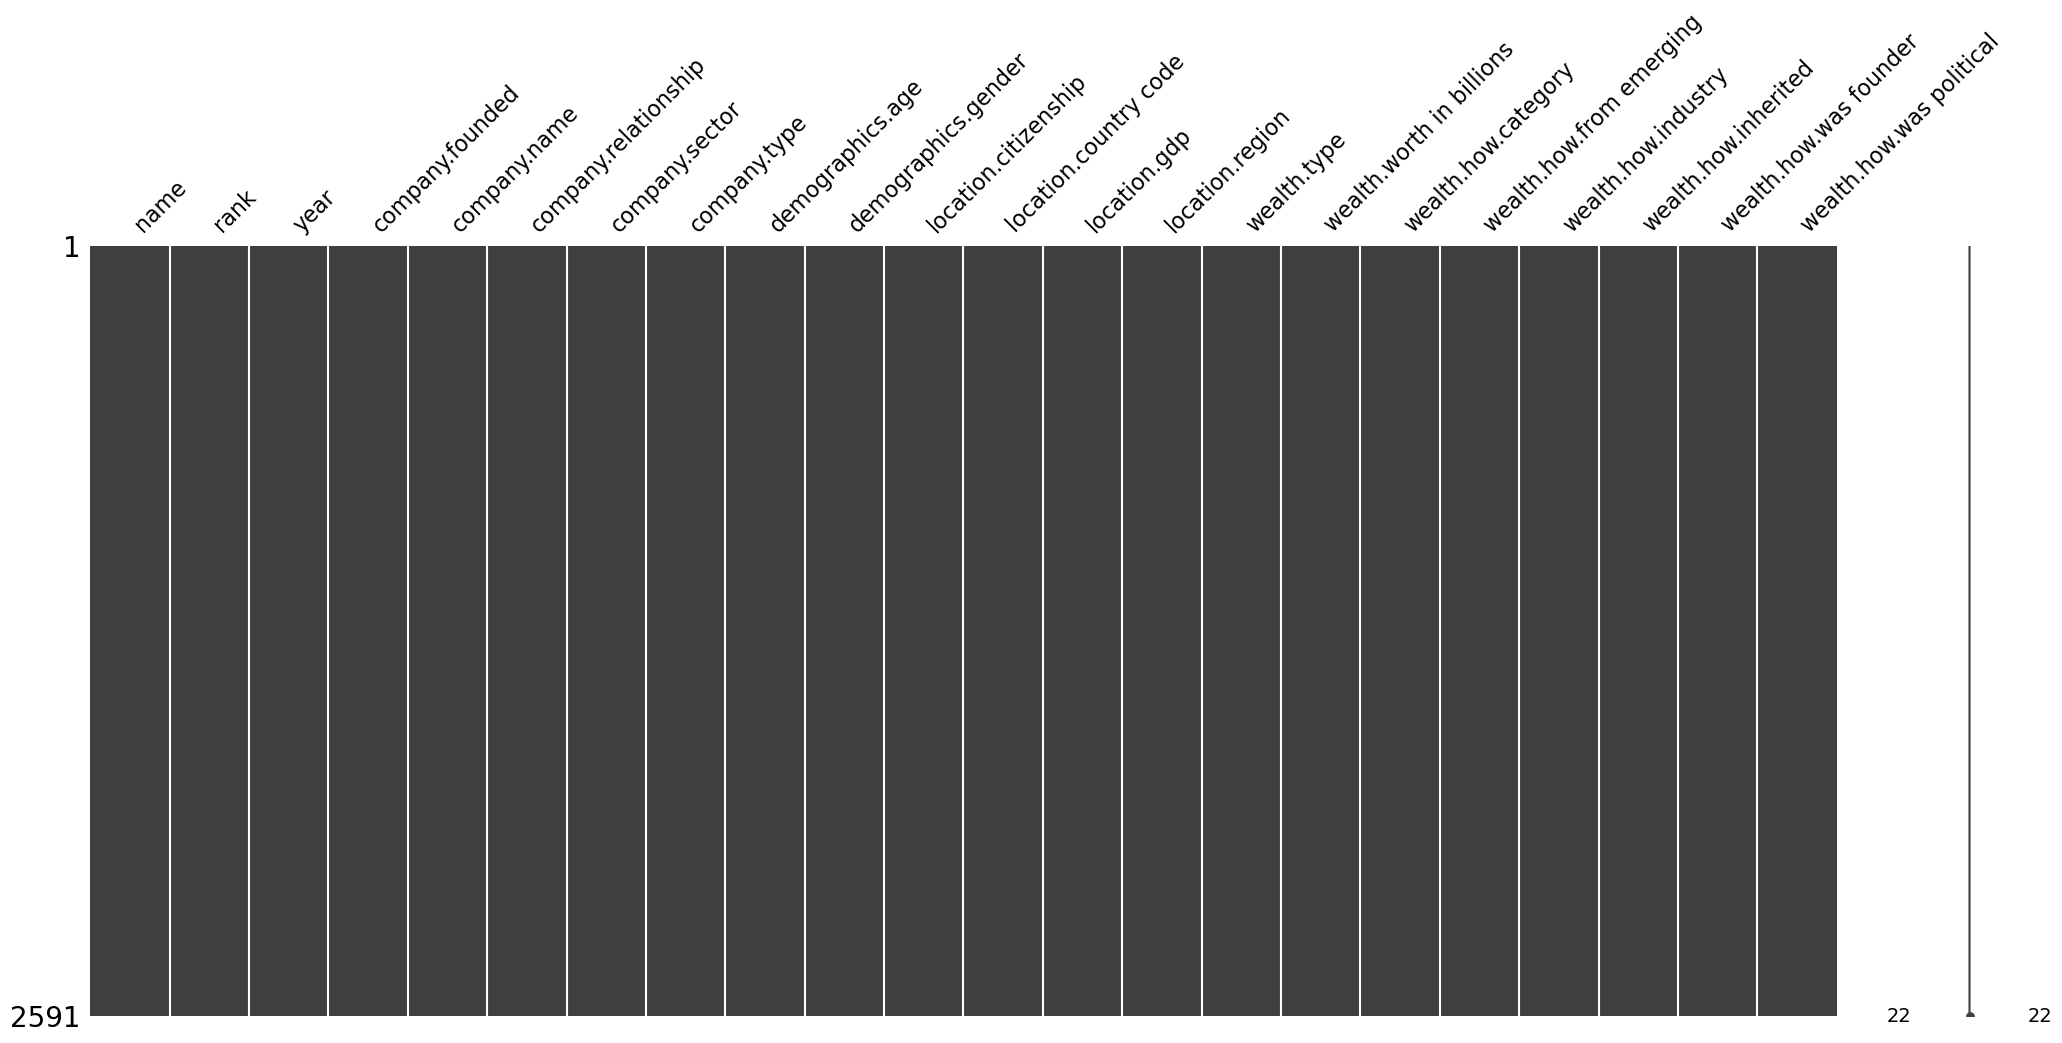

In [107]:
msno.matrix(df);

<div class='alert alert-block alert-info'>
    
**Insights:**   
- There are no null values in the dataset
</div>

In [108]:
#data profiling
import sweetviz as sv
data_profiling = sv.analyze(df)
data_profiling.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Uni-variate analysis

### Numerical attributes

In [109]:
num_cols

['rank',
 'year',
 'company.founded',
 'demographics.age',
 'location.gdp',
 'wealth.worth in billions']

#### rank variable

In [110]:
df['rank'].describe()

count    2591.000000
mean      602.455809
std       468.876403
min         1.000000
25%       215.000000
50%       446.000000
75%       988.000000
max      1565.000000
Name: rank, dtype: float64

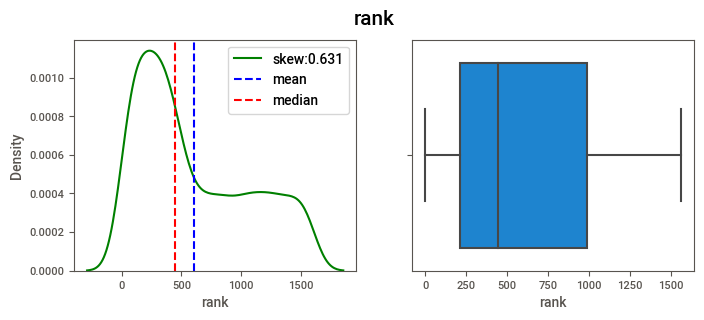

In [111]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(data= df,
            x='rank',
            color='green',
            label='skew:' + str(round(df['rank'].skew(),3)))
plt.axvline(x=df['rank'].mean(),
            color='blue',
            ls='--',
            label='mean')
plt.axvline(x=df['rank'].median(),
           color='red',
           ls='--',
           label='median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=df['rank'],
            data=df)
plt.suptitle('rank',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The rank attribute is right skewed with a value 0.693  
- there are no outliers in the distribution
</div>

#### year variable

In [112]:
df['year'].describe()

count    2591.000000
mean     2008.517947
std         7.429590
min      1996.000000
25%      2001.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: year, dtype: float64

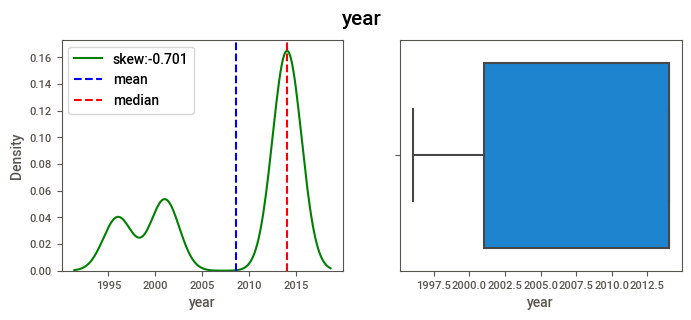

In [113]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(data= df,
            x='year',
            color='green',
            label='skew:' + str(round(df['year'].skew(),3)))
plt.axvline(x=df['year'].mean(),
            color='blue',
            ls='--',
            label='mean')
plt.axvline(x=df['year'].median(),
           color='red',
           ls='--',
           label='median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=df['year'],
            data=df)
plt.suptitle('year',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The rank attribute is left skewed with a value -0.701 
- there are no outliers in the distribution
- the univariate study for this variable is not essential as it is related to the other variables
</div>

#### company.founded

In [114]:
df['company.founded'].describe()

count    2591.000000
mean     1954.800849
std        42.849207
min      1610.000000
25%      1939.000000
50%      1963.000000
75%      1985.000000
max      2012.000000
Name: company.founded, dtype: float64

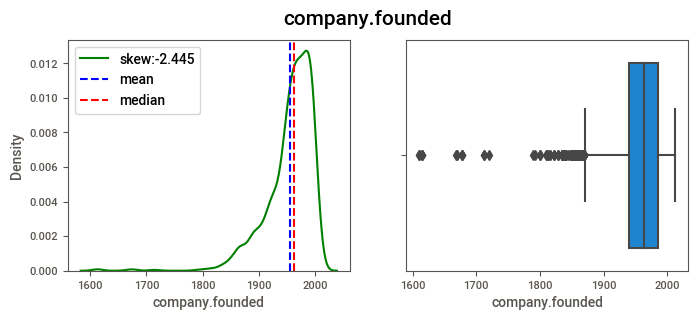

In [115]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(data= df,
            x='company.founded',
            color='green',
            label='skew:' + str(round(df['company.founded'].skew(),3)))
plt.axvline(x=df['company.founded'].mean(),
            color='blue',
            ls='--',
            label='mean')
plt.axvline(x=df['company.founded'].median(),
           color='red',
           ls='--',
           label='median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=df['company.founded'],
            data=df)
plt.suptitle('company.founded',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The  attribute is left skewed with a value -2.445 
- there are outliers in the distribution on the lower side
</div>

#### demographics.age

In [116]:
df['demographics.age'].describe()

count    2591.000000
mean       62.218834
std        12.214001
min        12.000000
25%        55.000000
50%        60.000000
75%        70.000000
max        98.000000
Name: demographics.age, dtype: float64

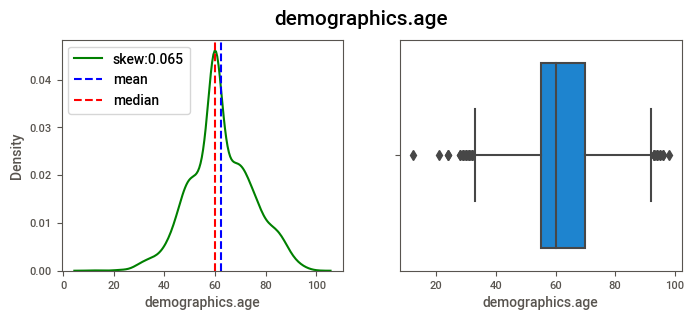

In [117]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(data= df,
            x='demographics.age',
            color='green',
            label='skew:' + str(round(df['demographics.age'].skew(),3)))
plt.axvline(x=df['demographics.age'].mean(),
            color='blue',
            ls='--',
            label='mean')
plt.axvline(x=df['demographics.age'].median(),
           color='red',
           ls='--',
           label='median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=df['demographics.age'],
            data=df)
plt.suptitle('demographics.age',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The  attribute is normally distributed
- there are outliers in the distribution on both the sides
</div>

#### location.gdp

In [118]:
df['location.gdp'].describe()

count    2.591000e+03
mean     1.873621e+12
std      3.499066e+12
min      2.504013e+09
25%      1.740000e+11
50%      1.740000e+11
75%      6.270000e+11
max      1.060000e+13
Name: location.gdp, dtype: float64

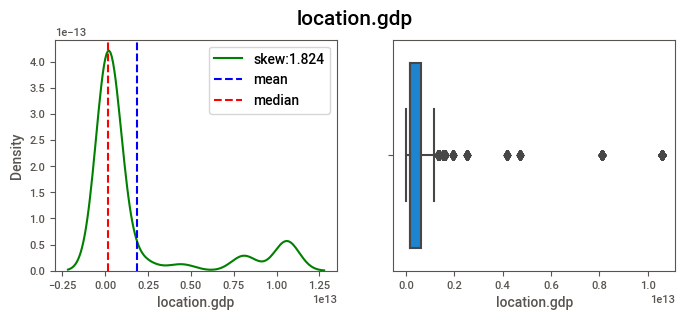

In [119]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(data= df,
            x='location.gdp',
            color='green',
            label='skew:' + str(round(df['location.gdp'].skew(),3)))
plt.axvline(x=df['location.gdp'].mean(),
            color='blue',
            ls='--',
            label='mean')
plt.axvline(x=df['location.gdp'].median(),
           color='red',
           ls='--',
           label='median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=df['location.gdp'],
            data=df)
plt.suptitle('location.gdp',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The  attribute is right skewed with a value of 1.824
- there are outliers in the distribution on the higher side
</div>

#### wealth.worth in billions

In [120]:
df['wealth.worth in billions'].describe()

count    2591.000000
mean        3.547009
std         5.106827
min         1.000000
25%         1.400000
50%         2.000000
75%         3.500000
max        76.000000
Name: wealth.worth in billions, dtype: float64

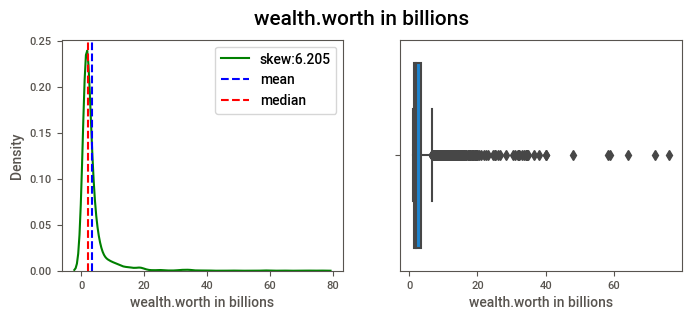

In [121]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(data= df,
            x='wealth.worth in billions',
            color='green',
            label='skew:' + str(round(df['wealth.worth in billions'].skew(),3)))
plt.axvline(x=df['wealth.worth in billions'].mean(),
            color='blue',
            ls='--',
            label='mean')
plt.axvline(x=df['wealth.worth in billions'].median(),
           color='red',
           ls='--',
           label='median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x=df['wealth.worth in billions'],
            data=df)
plt.suptitle('wealth.worth in billions',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The  attribute is highly skewed to the right with a value of 6.205
- there are outliers in the distribution on the higher side
</div>

### Categorical  attributes

In [122]:
cat_cols

['name',
 'company.name',
 'company.relationship',
 'company.sector',
 'company.type',
 'demographics.gender',
 'location.citizenship',
 'location.country code',
 'location.region',
 'wealth.type',
 'wealth.how.category',
 'wealth.how.from emerging',
 'wealth.how.industry',
 'wealth.how.inherited',
 'wealth.how.was founder',
 'wealth.how.was political']

#### name

In [123]:
df['name'].describe()

count           2591
unique          2054
top       Bill Gates
freq               3
Name: name, dtype: object

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives names of the billionaire in the dataset, with the most frequently occuring billionaire Bill Gates
</div>

In [124]:
df[df['name'] == 'Bill Gates']

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8100000000000,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,10600000000000,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,174000000000,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True


#### company.name

In [125]:
df['company.name'].describe()

count       2591
unique      1575
top       NONAME
freq          19
Name: company.name, dtype: object

In [126]:
#creating a temp df for company names not equal to null
temp_df = pd.DataFrame(df[df['company.name'] != 'NONAME'])

In [127]:
temp_df['company.name'].describe()

count        2572
unique       1574
top       Walmart
freq           18
Name: company.name, dtype: object

In [128]:
df[df['company.name'] == 'Walmart' ]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
20,Jim Walton,7,2001,1962,Walmart,relation,retail,new,53,male,...,10600000000000,North America,inherited,18.8,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
22,John Walton,8,2001,1962,Walmart,relation,retail,new,55,male,...,10600000000000,North America,inherited,18.7,Traded Sectors,True,Consumer,father,True,True
25,S Robson Walton,9,2001,1962,Walmart,relation,retail,new,57,male,...,10600000000000,North America,inherited,18.6,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
26,Christy Walton,9,2014,1962,Walmart,relation,retail,new,59,female,...,174000000000,North America,inherited,36.7,Non-Traded Sectors,True,"Retail, Restaurant",spouse/widow,True,True
28,Alice Walton,10,2001,1962,Walmart,relation,retail,new,52,female,...,10600000000000,North America,inherited,18.5,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
29,Helen Walton,10,2001,1962,Walmart,relation,retail,new,81,female,...,10600000000000,North America,inherited,18.5,Traded Sectors,True,Consumer,spouse/widow,True,True
30,Jim Walton,10,2014,1962,Walmart,relation,retail,new,66,male,...,174000000000,North America,inherited,34.7,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
38,Alice Walton,13,2014,1962,Walmart,relation,retail,new,64,female,...,174000000000,North America,inherited,34.3,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
41,S. Robson Walton,14,2014,1962,Walmart,relation,retail,new,70,male,...,174000000000,North America,inherited,34.2,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
111,John Walton,38,1996,1962,Walmart,relation,retail,new,50,male,...,8100000000000,North America,inherited,4.8,Traded Sectors,True,Consumer,father,True,True


In [129]:
print('The top 30 company names are:\n',temp_df['company.name'].value_counts().head(30))

The top 30 company names are:
 Walmart                       18
Campbell Soup                 16
Hyatt                         15
SAP AG                        12
Microsoft                     11
Sid Richardson Gasoline Co    11
The Gap                       10
Mars, Incorperated            10
Oetker-Gruppe                 10
Berkshire Hathaway             9
Ziff Davis Inc                 9
S. C. Johnson & Son            9
Cargill                        8
Koch industries                8
Standard Oil                   8
Votorantim Group               8
Est?Lauder                     8
Maxingvest AG                  7
Tetra Pak                      7
Cox Enterprises                7
Samsung                        7
Alfa Group                     7
Construcciones y Contratas     6
Home Depot                     6
SAS institute                  6
Saudi Oger                     6
Metro AG                       6
Holcim                         6
Loews Corporation              6
Fidelity Inv

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives company names of the billionaire in the dataset, 
    with the  3 most frequently occuring company
    -  Walmart followed by 
    -  Campbell Soup followed by
    -  Hyatt
</div>

#### company.relationship

In [130]:
df['company.relationship'].describe()

count        2591
unique         74
top       founder
freq         1240
Name: company.relationship, dtype: object

In [131]:
print(' The top 10 company.relationship are:\n', df['company.relationship'].value_counts().head(10))

 The top 10 company.relationship are:
 founder                                 1240
relation                                 943
owner                                     94
chairman                                  76
investor                                  36
Chairman and Chief Executive Officer      29
CEO                                       16
president                                 13
ceo                                        9
former CEO                                 8
Name: company.relationship, dtype: int64


<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives relationship of the billionaire with the company of the billionaire in the dataset, 
    with the  3 most frequently occuring relationship
    -  founder followed by 
    -  relation  followed by
    -  owner
</div>

#### company.sector

In [132]:
df['company.sector'].describe()

count            2591
unique            520
top       real estate
freq              177
Name: company.sector, dtype: object

In [133]:
print('The top 10 frequently occuring company sector are :\n',df['company.sector'].value_counts().head(10))

The top 10 frequently occuring company sector are :
 real estate        177
retail             120
media              117
construction        96
banking             93
pharmaceuticals     76
oil                 74
software            67
hedge funds         50
technology          36
Name: company.sector, dtype: int64


<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the sector of the company of the billionaire in the dataset, 
    with the  3 most frequently occuring sector
    -  real estate followed by 
    -  retail  followed by
    -  media
</div>

#### company.type

In [134]:
df['company.type'].describe()

count     2591
unique      13
top        new
freq      2316
Name: company.type, dtype: object

In [135]:
print('The frequently occuring company type in the order of frequency are :\n',df['company.type'].value_counts())

The frequently occuring company type in the order of frequency are :
 new                       2316
acquired                   203
privatization               42
subsidiary                   9
state owned enterprise       7
new/aquired                  3
merger                       3
franchise                    2
new, privitization           2
new division                 1
privatized                   1
franchise rights             1
joint venture                1
Name: company.type, dtype: int64


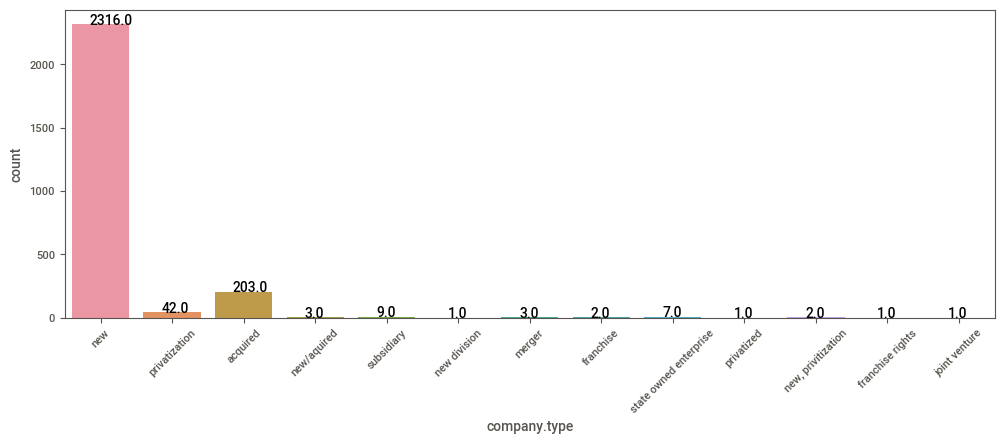

In [136]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
ax = sns.countplot(x='company.type',
             data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives relationship of the billionaire with the company type in the dataset, 
    with the  3 most frequently occuring relationship
    -  new followed by 
    -  acquired  followed by
    -  privatization
</div>

#### demographics.gender

In [137]:
df['demographics.gender'].describe()

count     2591
unique       3
top       male
freq      2340
Name: demographics.gender, dtype: object

In [138]:
print(df['demographics.gender'].value_counts())

male              2340
female             248
married couple       3
Name: demographics.gender, dtype: int64


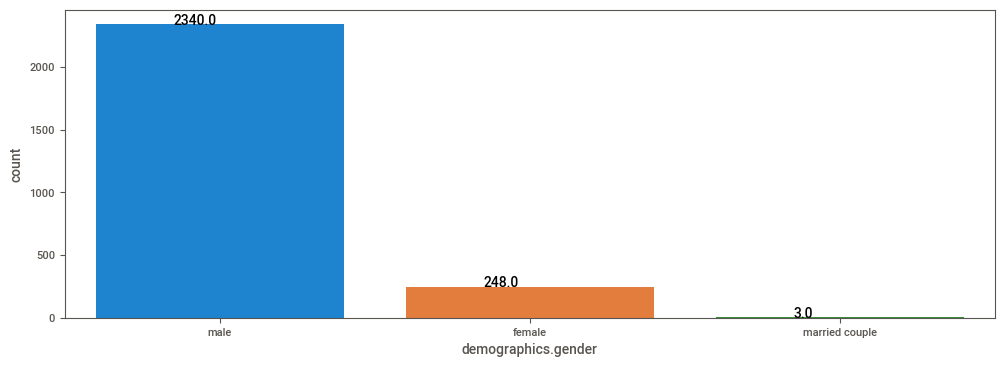

In [139]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=0)
ax = sns.countplot(x='demographics.gender',
             data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

In [140]:
### Married couple is not a gender let us check this data

In [141]:
df[df['demographics.gender'] == 'married couple']

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
805,Willi and Isolde Liebherr,268,1996,1949,Liebherr,relation,construction,new,60,married couple,...,330000000000,Europe,inherited,1.5,Non-Traded Sectors,True,Constrution,not inherited,True,True
1109,Willi and Isolde Liebherr,363,2001,1949,Liebherr,relation,construction,new,60,married couple,...,279000000000,Europe,inherited,1.4,Non-Traded Sectors,True,Constrution,not inherited,True,True
1435,Jacob and Yehudith Richter,490,2001,1992,Medinol,founder,pharmaceuticals,new,60,married couple,...,130000000000,Middle East/North Africa,founder non-finance,1.0,New Sectors,True,Technology-Medical,not inherited,True,True


In [142]:
### let us change this data to male for analysis
rep_demographic_gender =  'male'
df['demographics.gender'] = df['demographics.gender'].replace('married couple', rep_demographic_gender)

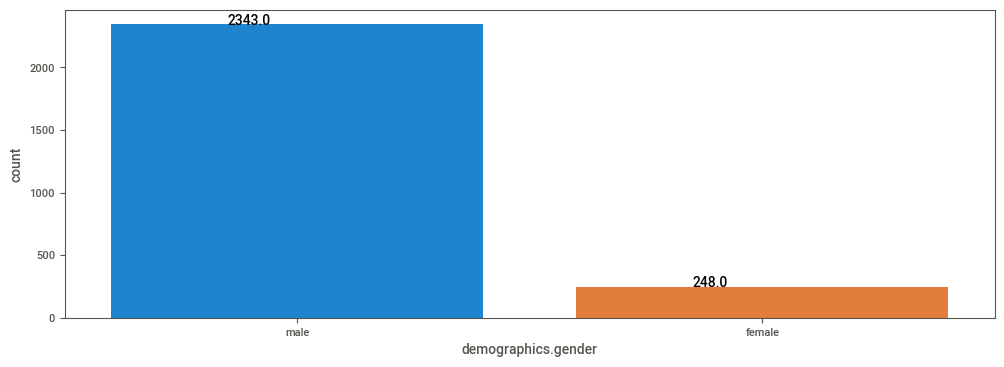

In [143]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=0)
ax = sns.countplot(x='demographics.gender',
             data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives gender  of the billionaire e in the dataset, 
    with the  most frequently gender being
    -  Male
</div>

#### location.citizenship

In [144]:
df['location.citizenship'].describe()

count              2591
unique               73
top       United States
freq                902
Name: location.citizenship, dtype: object

In [145]:
print('The top 10 citizenship of the billionaire is: \n',df['location.citizenship'].value_counts().head(10))

The top 10 citizenship of the billionaire is: 
 United States     902
Germany           155
China             153
Russia            119
Japan              89
Brazil             81
Hong Kong          77
France             72
United Kingdom     64
India              63
Name: location.citizenship, dtype: int64


<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the citizenship of the billionaire in the dataset, 
    with the  3 most frequently occuring citizenship
    -  United States followed by 
    -  Germany  followed by
    -  China
</div>

#### location.country code

In [146]:
df['location.country code'].describe()

count     2591
unique      74
top        USA
freq       902
Name: location.country code, dtype: object

In [147]:
print('The top 10 location.country code of the billionaire is: \n',df['location.country code'].value_counts().head(10))

The top 10 location.country code of the billionaire is: 
 USA    902
DEU    155
CHN    153
RUS    119
JPN     89
BRA     81
HKG     77
FRA     72
GBR     64
IND     63
Name: location.country code, dtype: int64


<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the citizenship country code of the billionaire in the dataset, 
    with the  3 most frequently occuring citizenship
    -  United States followed by 
    -  Germany  followed by
    -  China
which is in accordance with the earlier analysis of the citizenship.
- this is redundant data as the data is already available in the citizenship column
</div>

#### location.region

In [148]:
df['location.region'].describe()

count              2591
unique                7
top       North America
freq                992
Name: location.region, dtype: object

In [149]:
print('The continents in ranking of their occurence in the dataset:\n',df['location.region'].value_counts())

The continents in ranking of their occurence in the dataset:
 North America               992
Europe                      691
East Asia                   523
Latin America               179
Middle East/North Africa    117
South Asia                   69
Sub-Saharan Africa           20
Name: location.region, dtype: int64


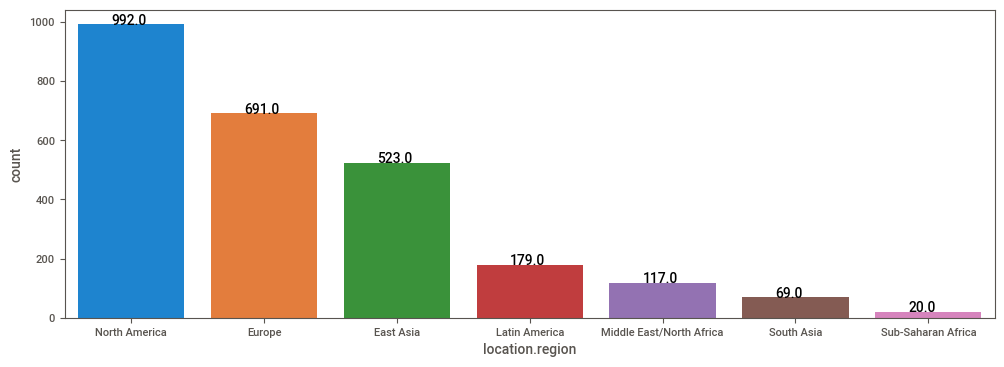

In [150]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=0)
ax = sns.countplot(x='location.region',
             data=df,
             order= ['North America', 'Europe', 'East Asia', 'Latin America', 'Middle East/North Africa', 'South Asia', 'Sub-Saharan Africa' ])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the continent of the billionaire in the dataset, 
    with the  3 top being
    -  North America followed by 
    -  Europe  followed by
    -  East Asia
which is in accordance with the earlier analysis of the citizenship.
</div>

#### wealth.type

In [151]:
df['wealth.type'].describe()

count          2591
unique            5
top       inherited
freq            956
Name: wealth.type, dtype: object

In [152]:
print('The wealth.type in ranking of their occurence in the dataset:\n',df['wealth.type'].value_counts())

The wealth.type in ranking of their occurence in the dataset:
 inherited                   956
founder non-finance         713
self-made finance           499
privatized and resources    235
executive                   188
Name: wealth.type, dtype: int64


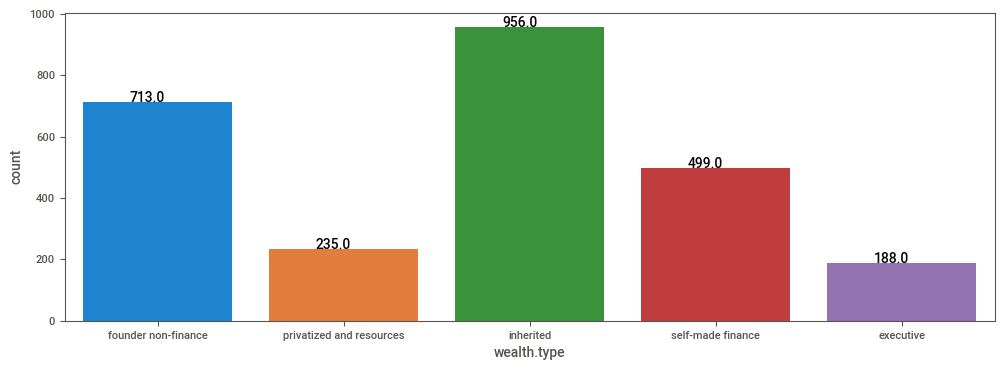

In [153]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=0)
ax = sns.countplot(x='wealth.type',
             data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the type of the wealth of the billionaire in the dataset, 
    with the  3 top being
    -  inherited followed by 
    -  founder non-finance  followed by
    -  self-made finance

</div>

#### wealth.how.category

In [154]:
df['wealth.how.category'].describe()

count          2591
unique            7
top       Financial
freq            876
Name: wealth.how.category, dtype: object

In [155]:
print('The wealth.how.category in ranking of their occurence in the dataset:\n',df['wealth.how.category'].value_counts())

The wealth.how.category in ranking of their occurence in the dataset:
 Financial             876
Non-Traded Sectors    593
Traded Sectors        556
New Sectors           319
Resource Related      245
Trucking                1
energy                  1
Name: wealth.how.category, dtype: int64


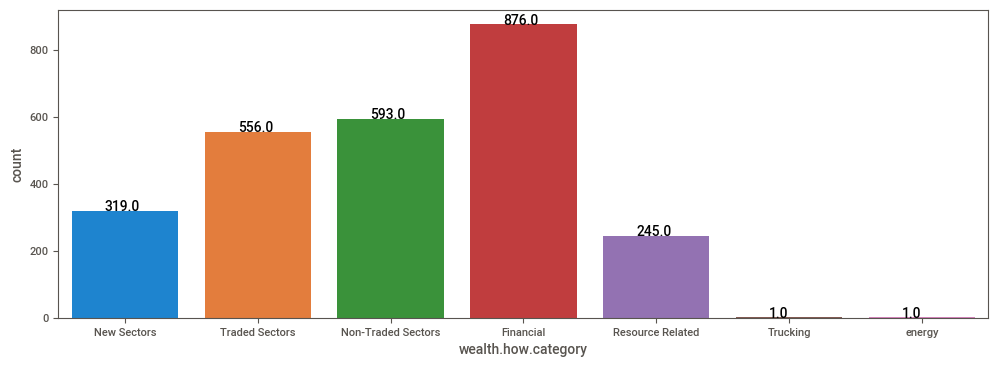

In [156]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=0)
ax = sns.countplot(x='wealth.how.category',
             data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the wealth.how.category of the billionaire in the dataset, 
    with the  3 top being
    -  Financial  followed by 
    -  Non-Traded Sectors  followed by
    - Traded Sectors

</div>

#### wealth.how.from emerging

In [157]:
df['wealth.how.from emerging'].describe()

count     2591
unique       1
top       True
freq      2591
Name: wealth.how.from emerging, dtype: object

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the wealth.how.from emerging which is True for all the entries.
- This column can be dropped from the analysis
</div>

#### wealth.how.industry

In [158]:
df['wealth.how.industry'].describe()

count         2591
unique          17
top       Consumer
freq           482
Name: wealth.how.industry, dtype: object

In [159]:
print('The wealth.how.industry in ranking of their occurence in the dataset:\n',df['wealth.how.industry'].value_counts())

The wealth.how.industry in ranking of their occurence in the dataset:
 Consumer                           482
Retail, Restaurant                 280
Real Estate                        276
Money Management                   248
Media                              217
Technology-Computer                208
Diversified financial              164
Energy                             132
Technology-Medical                 111
Non-consumer industrial            105
Constrution                         96
Mining and metals                   90
Other                               81
Hedge funds                         67
Private equity/leveraged buyout     25
Venture Capital                      8
services                             1
Name: wealth.how.industry, dtype: int64


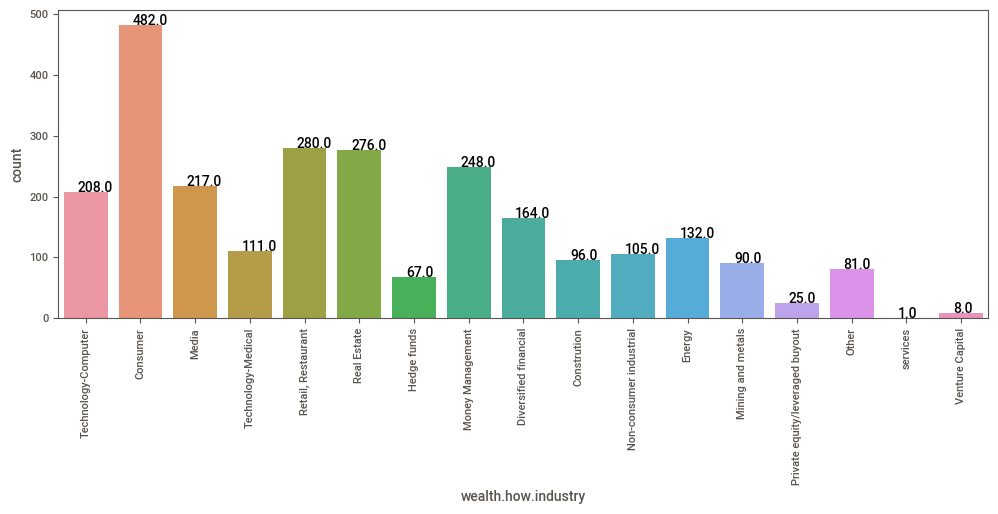

In [160]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
ax = sns.countplot(x='wealth.how.industry',
             data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the wealth.how.industry of the billionaire in the dataset, 
    with the  3 top being
    - Consumer  followed by 
    - Retail, Restaurant  followed by
    - Real Estate

</div>

#### wealth.how.inherited

In [161]:
df['wealth.how.inherited'].describe()

count              2591
unique                6
top       not inherited
freq               1668
Name: wealth.how.inherited, dtype: object

In [162]:
print('The wealth.how.inherited in ranking of their occurence in the dataset:\n',df['wealth.how.inherited'].value_counts())

The wealth.how.inherited in ranking of their occurence in the dataset:
 not inherited               1668
father                       556
3rd generation               209
4th generation                68
spouse/widow                  59
5th generation or longer      31
Name: wealth.how.inherited, dtype: int64


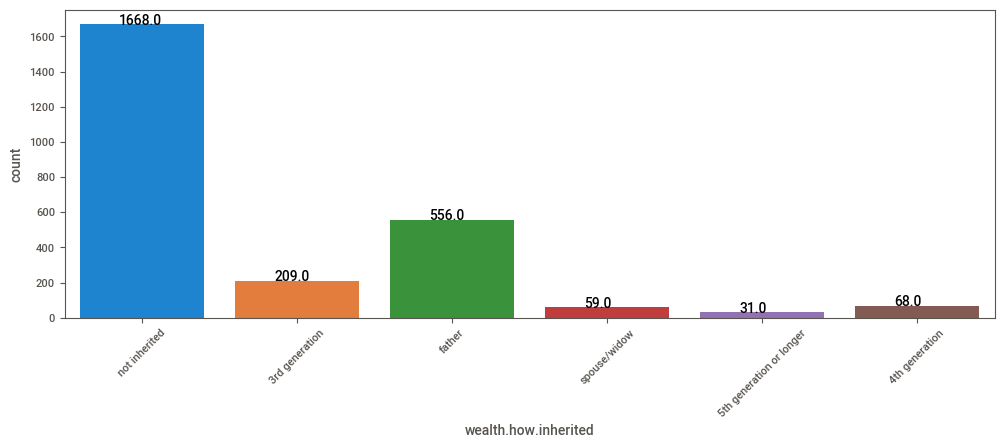

In [163]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
ax = sns.countplot(x='wealth.how.inherited',
                   data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the wealth.how.inherited of the billionaire in the dataset, 
    with the  3 top being
    -  not inherited  followed by 
    -  father  followed by
    - 3rd generation

</div>

#### wealth.how.was founder

In [164]:
df['wealth.how.was founder'].describe()

count     2591
unique       1
top       True
freq      2591
Name: wealth.how.was founder, dtype: object

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the wealth.how.was founder which is True for all the entries.
- This column can be dropped from the analysis
</div>

#### wealth.how.was political

In [165]:
df['wealth.how.was political'].describe()

count     2591
unique       1
top       True
freq      2591
Name: wealth.how.was political, dtype: object

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The attribute gives the wealth.how.was political which is True for all the entries.
- This column can be dropped from the analysis
</div>

## dropping the three columns which have all true entries namely: 
- wealth.how.from emerging , 
- wealth.how.was founder, 
- wealth.how.was political
## we can also drop the  location.country code which has redundant data which is already present in the citizenship

In [166]:
df_drop = pd.DataFrame(df)

In [167]:
df_drop.shape

(2591, 22)

In [168]:
df_drop.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [169]:
df_drop.drop(['wealth.how.from emerging', 'wealth.how.was founder', 'wealth.how.was political' , 'location.country code' ],
             axis=1,
            inplace=True)

In [170]:
df_drop.shape

(2591, 18)

In [171]:
df_drop.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.gdp', 'location.region', 'wealth.type',
       'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.industry', 'wealth.how.inherited'],
      dtype='object')

### Bivariate analysis

In [172]:
num_cols

['rank',
 'year',
 'company.founded',
 'demographics.age',
 'location.gdp',
 'wealth.worth in billions']

In [173]:
cat_cols

['name',
 'company.name',
 'company.relationship',
 'company.sector',
 'company.type',
 'demographics.gender',
 'location.citizenship',
 'location.country code',
 'location.region',
 'wealth.type',
 'wealth.how.category',
 'wealth.how.from emerging',
 'wealth.how.industry',
 'wealth.how.inherited',
 'wealth.how.was founder',
 'wealth.how.was political']

In [174]:
hue_cols = ['demographics.gender', 'wealth.type', 'wealth.how.category', 'wealth.how.industry']

In [175]:
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8100000000000,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,10600000000000,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,174000000000,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8100000000000,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,10600000000000,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [176]:
num_cols

['rank',
 'year',
 'company.founded',
 'demographics.age',
 'location.gdp',
 'wealth.worth in billions']

In [177]:
cat_cols

['name',
 'company.name',
 'company.relationship',
 'company.sector',
 'company.type',
 'demographics.gender',
 'location.citizenship',
 'location.country code',
 'location.region',
 'wealth.type',
 'wealth.how.category',
 'wealth.how.from emerging',
 'wealth.how.industry',
 'wealth.how.inherited',
 'wealth.how.was founder',
 'wealth.how.was political']

In [178]:
df_wealth_company_wise = pd.DataFrame(df.groupby(['company.name'])['wealth.worth in billions'].sum().sort_values(ascending=False))

In [179]:
df_wealth_company_wise.head()

,wealth.worth in billions
company.name,
Walmart,271.2
Microsoft,248.9
Berkshire Hathaway,113.9
Koch industries,103.0
"Mars, Incorperated",99.0


In [180]:
df_wealth_company_wise['location.gdp'] = (df.groupby(['company.name'])['location.gdp'].sum()/100000).sort_values(ascending=False)

In [181]:
df_wealth_company_wise.head()

,wealth.worth in billions,location.gdp
company.name,,
Walmart,271.2,1.157440e+09
Microsoft,248.9,6.739600e+08
Berkshire Hathaway,113.9,5.912200e+08
Koch industries,103.0,3.809600e+08
"Mars, Incorperated",99.0,6.472200e+08


In [182]:
df_wealth_company_sector = pd.DataFrame(df.groupby(['company.sector'])['wealth.worth in billions'].sum().sort_values(ascending=False))

In [183]:
df_wealth_company_sector['location.gdp'] = df.groupby(['company.sector'])['location.gdp'].sum()/100000

In [184]:
df_wealth_company_sector.head()

,wealth.worth in billions,location.gdp
company.sector,,
real estate,618.0,2.496496e+09
media,486.6,4.223923e+09
retail,481.3,2.281451e+09
technology,263.6,1.119980e+09
banking,245.2,8.738297e+08


In [185]:
df_wealth_citizenship_wise = pd.DataFrame(df.groupby(['location.citizenship'])['wealth.worth in billions'].sum().sort_values(ascending=False))

In [186]:
df_wealth_citizenship_wise['location.gdp'] = df.groupby(['location.citizenship'])['location.gdp'].sum()/100000

In [187]:
df_wealth_citizenship_wise.head()

,wealth.worth in billions,location.gdp
location.citizenship,,
United States,3541.0,4.021126e+10
Germany,657.1,1.743900e+09
Russia,434.9,2.177000e+08
China,377.1,2.777800e+08
Hong Kong,338.2,1.307600e+08


In [188]:
df_wealth_gender_wise = pd.DataFrame(df.groupby(['demographics.gender'])['wealth.worth in billions'].sum().sort_values(ascending=False))

In [189]:
df_wealth_gender_wise['location.gdp'] = df.groupby(['demographics.gender'])['location.gdp'].sum()

In [190]:
df_wealth_gender_wise.head()

,wealth.worth in billions,location.gdp
demographics.gender,,
male,8240.4,4385329257608963
female,949.9,469221975906967


In [191]:
df_wealth_gender_wise.reset_index(inplace=True)

In [192]:
df_wealth_gender_wise.head()

,demographics.gender,wealth.worth in billions,location.gdp
0,male,8240.4,4385329257608963
1,female,949.9,469221975906967


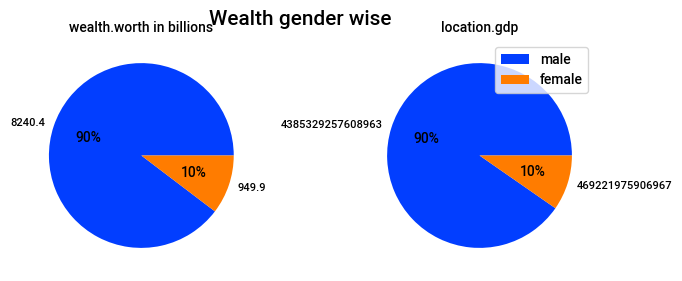

In [193]:
palette_color = sns.color_palette('bright')

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.pie(df_wealth_gender_wise['wealth.worth in billions'], labels=df_wealth_gender_wise['wealth.worth in billions'],
        colors=palette_color, autopct='%.0f%%')
plt.title('wealth.worth in billions', fontsize=10)

plt.subplot(1,2,2)
plt.pie(df_wealth_gender_wise['location.gdp'], labels=df_wealth_gender_wise['location.gdp'],
        colors=palette_color, autopct='%.0f%%')
plt.title('location.gdp', fontsize=10)
plt.legend( ['male', 'female']);

plt.suptitle('Wealth gender wise',fontsize=15)
plt.show()

<div class='alert alert_block alert-info'> 
    
**Insights**   
- Gender wise distribution of wealth among the billionaires:
    - Male have a higher percentage of wealth compared to female
    - The male category has 8240.4 wealth worth in billions and 
        - The female category has 949.9 wealth worth in billions
    - The location gdp also follows the same distribution
</div>

### Multivariate analysis

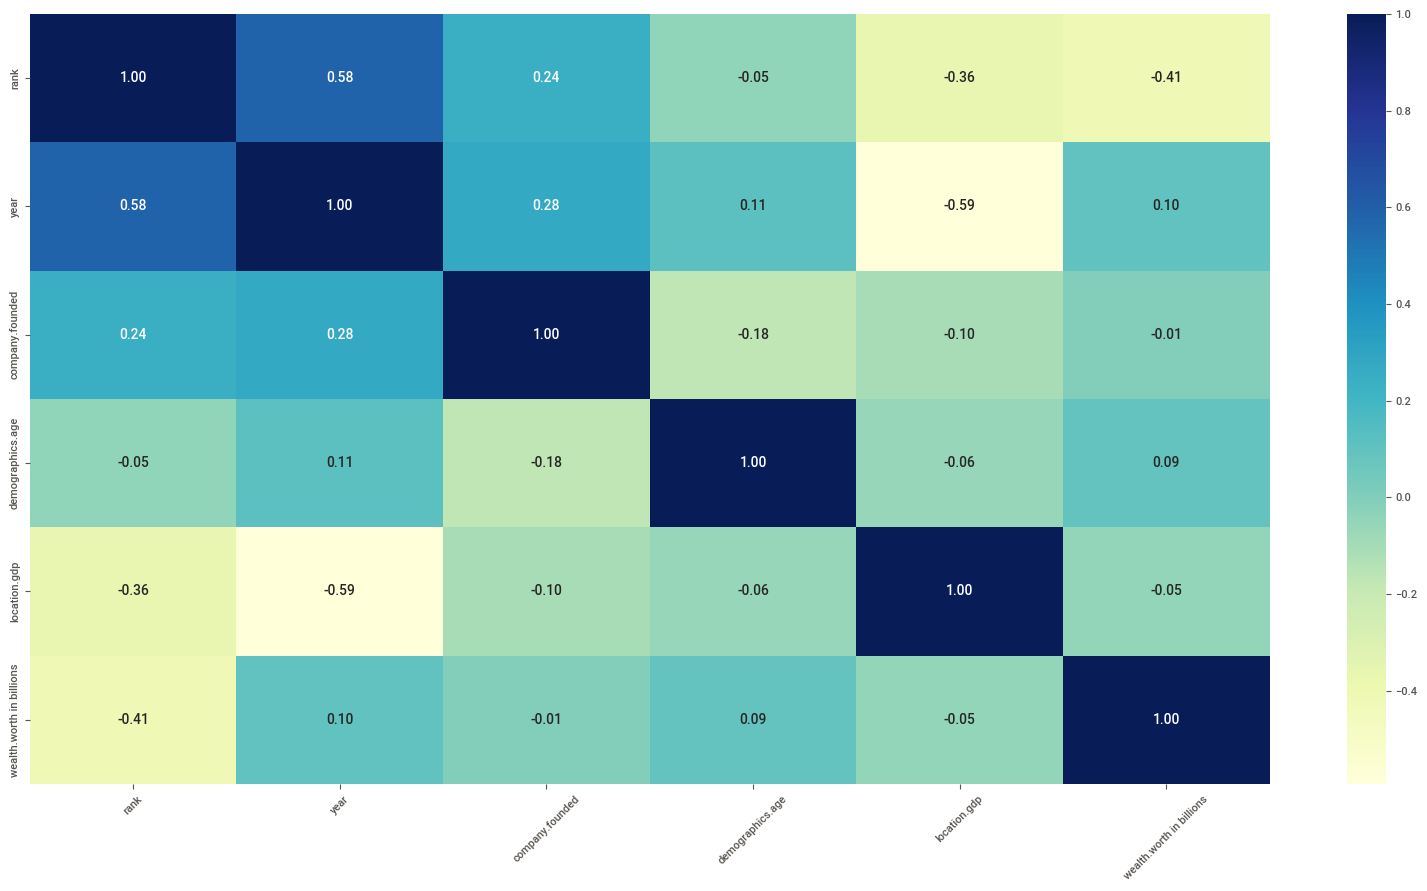

In [194]:
plt.figure(figsize=(20,10))
plt.tick_params(labelrotation=45)
sns.heatmap(df_drop.corr(),
            annot=True,
            cmap="YlGnBu",
            fmt="0.2f");

<Figure size 2000x1600 with 0 Axes>

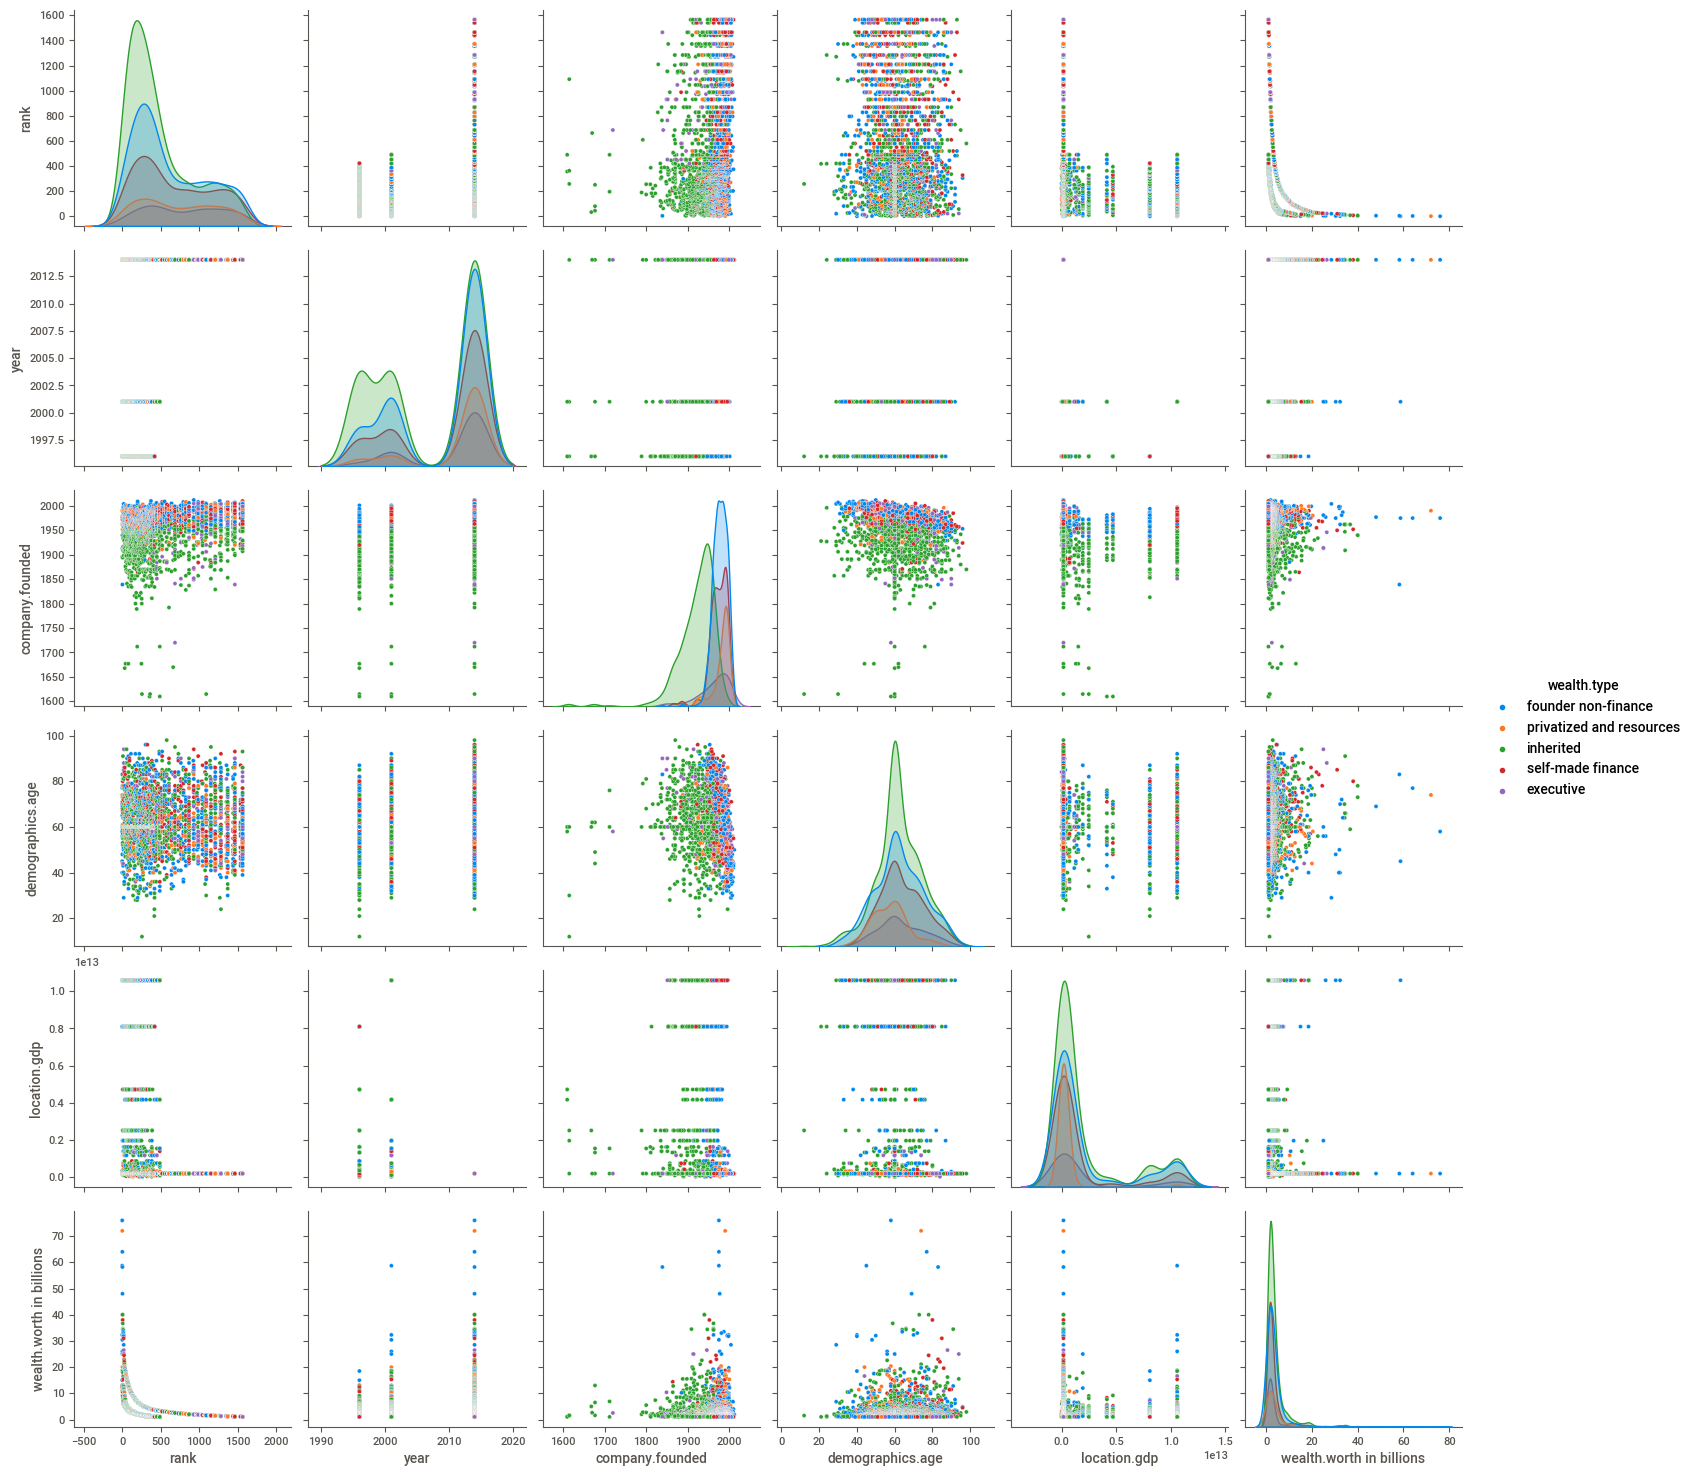

In [195]:
plt.figure(figsize=(20,16))
sns.pairplot(data=df_drop, 
             diag_kind='kde',
             hue ='wealth.type');

<div class='alert alert_block alert-info'> 
    
**Insights**   
- The correlation between the columns is low
</div>

## END